In [1]:
#Import some useful libraries and PQS data for Plasmodium species

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import collections
import itertools
from collections import defaultdict
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os
import Bio
from Bio.Seq import Seq
import warnings
warnings.filterwarnings('ignore')

Pfalciparum_data = pd.read_csv("/Users/HunterGage/Desktop/QGRS Mapper_Analysis/P.falciparum_analysis.csv")
Pgaboni_data = pd.read_csv("/Users/HunterGage/Desktop/QGRS Mapper_Analysis/P.gaboni_analysis.csv")
Padleri_data = pd.read_csv("/Users/HunterGage/Desktop/QGRS Mapper_Analysis/P.adleri_analysis.csv")
Pblacklocki_data = pd.read_csv("/Users/HunterGage/Desktop/QGRS Mapper_Analysis/P.blacklocki_analysis.csv")
Pbillcollinsi_data = pd.read_csv("/Users/HunterGage/Desktop/QGRS Mapper_Analysis/P.billcollinsi_analysis.csv")
Preichenowi_data = pd.read_csv("/Users/HunterGage/Desktop/QGRS Mapper_Analysis/P.reichenowi_analysis.csv")
Ppraefalciparum_data = pd.read_csv("/Users/HunterGage/Desktop/QGRS Mapper_Analysis/P.praefalciparum_analysis.csv") 
Prelictum_data = pd.read_csv("/Users/HunterGage/Desktop/QGRS Mapper_Analysis/P.relictum_analysis.csv")
Pgallinaceum_data = pd.read_csv("/Users/HunterGage/Desktop/QGRS Mapper_Analysis/P.gallinaceum_analysis.csv")
Pberghei_data = pd.read_csv("/Users/HunterGage/Desktop/QGRS Mapper_Analysis/P.berghei_analysis.csv")
Pchabaudi_data = pd.read_csv("/Users/HunterGage/Desktop/QGRS Mapper_Analysis/P.chabaudi_analysis.csv")

Pfalciparum_data_G4H = pd.read_csv("/Users/HunterGage/Desktop/G4 Hunter_Analysis/P.falciparum_G4analysis.csv")
Pgaboni_data_G4H = pd.read_csv("/Users/HunterGage/Desktop/G4 Hunter_Analysis/P.gaboni_G4analysis.csv")
Padleri_data_G4H = pd.read_csv("/Users/HunterGage/Desktop/G4 Hunter_Analysis/P.adleri_G4analysis.csv")
Pblacklocki_data_G4H = pd.read_csv("/Users/HunterGage/Desktop/G4 Hunter_Analysis/P.blacklocki_G4analysis.csv")
Pbillcollinsi_data_G4H = pd.read_csv("/Users/HunterGage/Desktop/G4 Hunter_Analysis/P.billcollinsi_G4analysis.csv")
Preichenowi_data_G4H = pd.read_csv("/Users/HunterGage/Desktop/G4 Hunter_Analysis/P.reichenowi_G4analysis.csv")
Ppraefalciparum_data_G4H = pd.read_csv("/Users/HunterGage/Desktop/G4 Hunter_Analysis/P.praefalciparum_G4analysis.csv")
Prelictum_data_G4H = pd.read_csv("/Users/HunterGage/Desktop/G4 Hunter_Analysis/P.relictum_G4analysis.csv")
Pgallinaceum_data_G4H = pd.read_csv("/Users/HunterGage/Desktop/G4 Hunter_Analysis/P.gallinaceum_G4analysis.csv")
Pberghei_data_G4H = pd.read_csv("/Users/HunterGage/Desktop/G4 Hunter_Analysis/P.berghei_G4analysis.csv")
Pchabaudi_data_G4H = pd.read_csv("/Users/HunterGage/Desktop/G4 Hunter_Analysis/P.chabaudi_G4analysis.csv")

In [2]:
#Filters data for all species by removing the PQSs that are not associated with any genes
#Ensures that all PQSs are within 2 kb of a genes
#Filters out telomeres

data = {"P.falciparum": Pfalciparum_data, "P.gaboni": Pgaboni_data, "P.adleri": Padleri_data, "P.blacklocki": Pblacklocki_data, "P.billcollinsi": Pbillcollinsi_data, "P.reichenowi": Preichenowi_data, "P.praefalciparum": Ppraefalciparum_data, "P.relictum": Prelictum_data, "P.gallinaceum": Pgallinaceum_data, "P.berghei": Pberghei_data, "P.chabaudi": Pchabaudi_data, "P.falciparum_G4H": Pfalciparum_data_G4H,
        "P.gaboni_G4H": Pgaboni_data_G4H,"P.adleri_G4H": Padleri_data_G4H, "P.blacklocki_G4H": Pblacklocki_data_G4H, "P.billcollinsi_G4H": Pbillcollinsi_data_G4H, "P.reichenowi_G4H": Preichenowi_data_G4H, "P.praefalciparum_G4H": Ppraefalciparum_data_G4H, "P.relictum_G4H": Prelictum_data_G4H, "P.gallinaceum_G4H": Pgallinaceum_data_G4H, "P.berghei_G4H": Pberghei_data_G4H, "P.chabaudi_G4H": Pchabaudi_data_G4H}    

filtered_data_has_gene = {}
for species in data:
    has_gene = data.get(species)["Coding, upstream, or downstream?"] != "None"
    species_data = data.get(species)[has_gene]
    filtered_data_has_gene.update({species: species_data})
    pd.to_numeric(filtered_data_has_gene[species]["Distance from nearest gene"])
    filtered_data_has_gene[species]["Distance from nearest gene"] = filtered_data_has_gene[species]["Distance from nearest gene"].replace(np.nan, 0)
    filtered_data_has_gene[species] = filtered_data_has_gene[species][filtered_data_has_gene[species]["Distance from nearest gene"].abs() <= 2000]
    filtered_data_has_gene[species]["Telomere?"] = filtered_data_has_gene[species]["Telomere?"].replace(np.nan, "No")
    filtered_data_has_gene[species]["upsB?"] = filtered_data_has_gene[species]["upsB?"].replace(np.nan, "No")
    filtered_data_has_gene[species] = filtered_data_has_gene[species][~filtered_data_has_gene[species]["Telomere?"].str.contains("Yes")]
#filtered_data_has_gene["P.falciparum"]

In [3]:
#Filters data for all species by removing the PQS in telomeres

data_no_telomeres = {}
for species in data:
    no_telomeres = data[species]
    data_no_telomeres.update({species: no_telomeres})
    data_no_telomeres[species]["Telomere?"] = data_no_telomeres[species]["Telomere?"].replace(np.nan, "No")
    data_no_telomeres[species] = data_no_telomeres[species][~data_no_telomeres[species]["Telomere?"].str.contains("Yes")]
#data_no_telomeres["P.falciparum"]

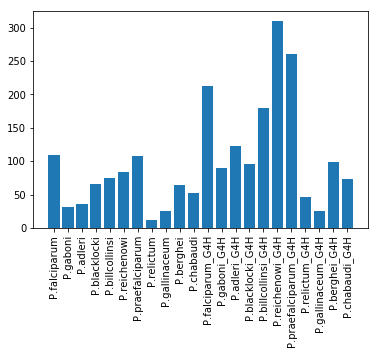

In [4]:
#Compares "total" number of PQSs across the Plasmodium species
#Includes repeats (multiple PQS associated with the same Gene ID) and non-gene-associated PQSs
#Excludes telomeres
#Used in Fig 2

summary_dict = {}
for species in data_no_telomeres:
    count = 0
    for row in data_no_telomeres[species]["Nearest gene ID"]:
        count += 1
    summary_dict.update({species: count})

plt.bar(range(len(summary_dict)), list(summary_dict.values()), align='center')
plt.xticks(range(len(summary_dict)), list(summary_dict.keys()), rotation=90)
plt.show()

data_to_save = pd.DataFrame(summary_dict, index=[0]).T
data_to_save.to_csv("/Users/HunterGage/Desktop/Summary Data and Figures/Number of G4s in each Lavaranian genome.csv")

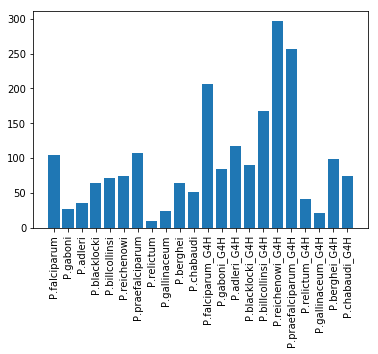

In [5]:
#Compares "total" number of gene-associated PQSs across Plasmodium species
#Only considers PQS that are associated with annotated genes and within 2000 bp of the gene
#Includes repeats (multiple PQS associated with the same Gene ID)
#Excludes telomeres

summary_dict = {}
for species in filtered_data_has_gene:
    count = 0
    for row in filtered_data_has_gene[species]["Nearest gene ID"]:
        count += 1
    summary_dict.update({species: count})

plt.bar(range(len(summary_dict)), list(summary_dict.values()), align='center')
plt.xticks(range(len(summary_dict)), list(summary_dict.keys()), rotation=90)
plt.show()


            P.falciparum   P.gaboni   P.adleri  P.blacklocki  P.billcollinsi  \
count          42.000000  10.000000  15.000000       27.0000       36.000000   
percentage     40.384615  37.037037  41.666667       42.1875       50.704225   
total         104.000000  27.000000  36.000000       64.0000       71.000000   

            P.reichenowi  P.praefalciparum  P.relictum  P.gallinaceum  \
count          35.000000         40.000000         0.0            0.0   
percentage     46.666667         37.383178         0.0            0.0   
total          75.000000        107.000000        10.0           24.0   

            P.berghei       ...        P.gaboni_G4H  P.adleri_G4H  \
count             0.0       ...           36.000000     53.000000   
percentage        0.0       ...           42.352941     45.299145   
total            64.0       ...           85.000000    117.000000   

            P.blacklocki_G4H  P.billcollinsi_G4H  P.reichenowi_G4H  \
count              22.000000           

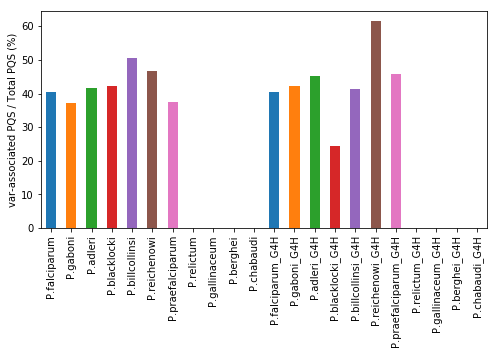

In [6]:
#Compares all Lavaranian genomes for the proportion of PQSs that are var-associated
#Only considers PQSs that are associated with annotated genes and within 2000 bp of the gene
#Includes repeats (multiple PQS associated with the same Gene ID)
#Excludes telomeres

summary_data = {}
for species in filtered_data_has_gene:
    count = 0
    total = 0
    for annotation in filtered_data_has_gene.get(species)["Gene Annotation"]:
        if str(annotation).find("erythrocyte membrane protein") != -1:
            count += 1
        total += 1
    summary_dict = {"count": count, "total": total, "percentage":(count / total)*100}
    summary_data.update({species: summary_dict})
print(pd.DataFrame(summary_data))

plt.figure(figsize=(8,4))
ax = pd.DataFrame(summary_data).loc["percentage"].plot.bar()
ax.set_xticklabels(summary_data.keys())
ax.set_ylabel('var-associated PQS / Total PQS (%)')
ax

In [7]:
#Filters data for all species by removing PQSs that are not associated with any genes and by removing repeats (multiple PQS with the same Gene ID)
#Only considers PQS that are associated with annotated genes and within 2000 bp of the gene
#Excludes telomeres

filtered_data_has_gene_no_repeats = {}
for species in data:
    species_geneID = list(filtered_data_has_gene[species]["Nearest gene ID"])
    species_geneID_unique = []
    species_geneID_unique_location = []
    for geneID in species_geneID:
        if not geneID in species_geneID_unique:
            species_geneID_unique.append(geneID)
            species_geneID_unique_location.append(filtered_data_has_gene[species].loc[filtered_data_has_gene[species]["Nearest gene ID"] == geneID].iloc[0]["Location"])
    filtered_data = filtered_data_has_gene[species][filtered_data_has_gene[species]["Location"].isin(species_geneID_unique_location)]
    filtered_data_has_gene_no_repeats.update({species: filtered_data})
#filtered_data_has_gene_no_repeats["P.gaboni"]

            P.falciparum  P.gaboni   P.adleri  P.blacklocki  P.billcollinsi  \
count           29.00000       9.0  14.000000      8.000000       22.000000   
percentage      40.84507      37.5  46.666667     24.242424       42.307692   
total           71.00000      24.0  30.000000     33.000000       52.000000   

            P.reichenowi  P.praefalciparum  P.relictum  P.gallinaceum  \
count               30.0         31.000000         0.0            0.0   
percentage          50.0         41.333333         0.0            0.0   
total               60.0         75.000000        10.0           15.0   

            P.berghei       ...        P.gaboni_G4H  P.adleri_G4H  \
count             0.0       ...           24.000000     36.000000   
percentage        0.0       ...           34.285714     38.297872   
total            60.0       ...           70.000000     94.000000   

            P.blacklocki_G4H  P.billcollinsi_G4H  P.reichenowi_G4H  \
count              17.000000           29.0

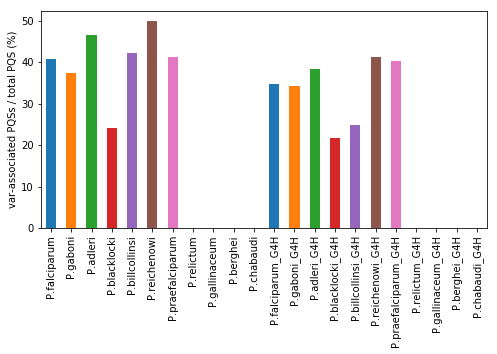

In [8]:
#Compares all Lavaranian genomes for the proportion of PQSs that are var-associated
#Only considers PQS that are associated with annotated genes and within 2000 bp of the gene
#Excludes telomeres
#EXLCUDES repeats (multiple PQS associated with the same Gene ID)

summary_data = {}
for species in filtered_data_has_gene_no_repeats:
    count = 0
    total = 0
    for annotation in filtered_data_has_gene_no_repeats.get(species)["Gene Annotation"]:
        if str(annotation).find("erythrocyte membrane protein") != -1:
            count += 1
        total += 1
    summary_dict = {"count": count, "total": total, "percentage":(count / total)*100}
    summary_data.update({species: summary_dict})
print(pd.DataFrame(summary_data))

plt.figure(figsize=(8,4))
ax = pd.DataFrame(summary_data).loc["percentage"].plot.bar()
ax.set_xticklabels(summary_data.keys())
ax.set_ylabel('var-associated PQSs / total PQS (%)')
ax

                   P.falciparum   P.gaboni   P.adleri  P.blacklocki  \
antisense             49.000000  17.000000  25.000000          48.0   
percent antisense     47.115385  62.962963  69.444444          75.0   
sense                 55.000000  10.000000  11.000000          16.0   
total                104.000000  27.000000  36.000000          64.0   

                   P.billcollinsi  P.reichenowi  P.praefalciparum  P.relictum  \
antisense               38.000000     44.000000         46.000000         6.0   
percent antisense       53.521127     58.666667         42.990654        60.0   
sense                   33.000000     31.000000         61.000000         4.0   
total                   71.000000     75.000000        107.000000        10.0   

                   P.gallinaceum  P.berghei       ...        P.gaboni_G4H  \
antisense               4.000000     9.0000       ...           52.000000   
percent antisense      16.666667    14.0625       ...           61.176471   
sense  

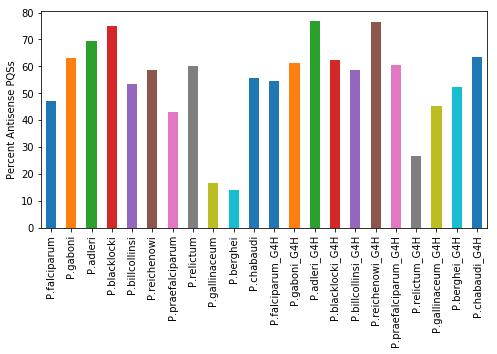

In [9]:
#Compares whether most PQSs are on the sense strand or antisense strand to the nearest gene
#Excludes telomeres and non-gene-associated PQSs
#Includes repeats
#Used in Fig 3

summary_data = {}
for species in filtered_data_has_gene:
    count_sense = 0
    count_antisense = 0
    for item in list(filtered_data_has_gene[species]["Strand (cf gene or nearest gene)"]):
        if item.lower() == "sense":
            count_sense += 1
        if item.lower() == "antisense":
            count_antisense += 1
    count_total = count_sense + count_antisense
    summary_dict = {"sense": count_sense, "antisense": count_antisense, "total": count_total, "percent antisense": (count_antisense / count_total) * 100}
    summary_data.update({species: summary_dict})
print(pd.DataFrame(summary_data))

plt.figure(figsize=(8,4))
ax = pd.DataFrame(summary_data).loc["percent antisense"].plot.bar()
ax.set_xticklabels(summary_data.keys())
ax.set_ylabel('Percent Antisense PQSs')
ax

data_to_save = pd.DataFrame(summary_data)
data_to_save.to_csv("/Users/HunterGage/Desktop/Summary Data and Figures/Apportionments of G4s in sense vz antisense strands.csv")

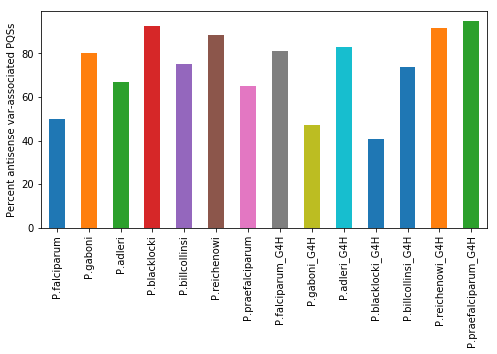

In [10]:
#Filters data for each species to only consider rows where PQS is associated with vars
#Compares whether most vars are on the sense or antisense strand to the PQS
#Excludes telomeres and non-gene-associated PQSs
#Includes repeats
#Used in Fig 3

summary_data = {}
filtered_data_erythrocyte_associated = {}
for species in filtered_data_has_gene:
    if "relictum" in species:
        continue
    if "gallinaceum" in species:
        continue
    if "berghei" in species:
        continue
    if "chabaudi" in species:
        continue
    filtered_data_erythrocyte = filtered_data_has_gene.get(species)[filtered_data_has_gene.get(species)["Gene Annotation"].str.contains("erythrocyte membrane protein")]
    filtered_data_erythrocyte_associated.update({species: filtered_data_erythrocyte})
    count_sense= 0
    count_antisense = 0
    for item in list(filtered_data_erythrocyte["Strand (cf gene or nearest gene)"]):
        if item.lower() == "sense":
            count_sense += 1
        if item.lower() == "antisense":
            count_antisense += 1
    count_total = count_sense + count_antisense
    summary_dict = {"sense": count_sense,
                    "antisense": count_antisense, 
                    "total": count_total, 
                    "percent antisense": (count_antisense / count_total) * 100}
    summary_data.update({species: summary_dict})
    filtered_data_erythrocyte_associated.update({species: filtered_data_erythrocyte})

plt.figure(figsize=(8,4))
ax = pd.DataFrame(summary_data).loc["percent antisense"].plot.bar()
ax.set_xticklabels(summary_data.keys())
ax.set_ylabel('Percent antisense var-associated PQSs')
ax

data_to_save = pd.DataFrame(summary_data)
data_to_save.to_csv("/Users/HunterGage/Desktop/Summary Data and Figures/Apportionments of var G4s in sense vz antisense strands.csv")

In [11]:
#Gets sense, antisense, ups, down, coding, noncoding data for var-associated PQSs
#Used in Fig 3

summary_data = {}

for species in filtered_data_erythrocyte_associated:
    count_sense = 0
    count_antisense = 0
    for item in list(filtered_data_erythrocyte_associated.get(species)["Strand (cf gene or nearest gene)"]):
        if item.lower() == "sense":
            count_sense += 1
        if item.lower() == "antisense":
            count_antisense += 1
    count_total = count_sense + count_antisense
    upstream = 0
    downstream = 0
    coding = 0
    for ups_down_coding in list(filtered_data_erythrocyte_associated.get(species)["Coding, upstream, or downstream?"]):
        if ups_down_coding.lower() == "ups":
            upstream += 1
        elif ups_down_coding.lower() == "down":
            downstream += 1
        elif ups_down_coding.lower() == "in":
            coding += 1
    summary_dict = {"sense": count_sense,
                    "antisense": count_antisense, 
                    "total": count_total, 
                    "percent antisense": (count_antisense / count_total) * 100,
                    "upstream": upstream,
                    "downstream": downstream,
                    "noncoding": (upstream + downstream),
                    "coding": coding,
                    "upstream / total (%)": (upstream / (upstream + downstream + coding)) * 100,
                    "coding / total (%)": (coding / (upstream + downstream + coding)) * 100}
    summary_data.update({species: summary_dict})
    
print(pd.DataFrame(summary_data))

data_to_save = pd.DataFrame(summary_data)
data_to_save.to_csv("/Users/HunterGage/Desktop/Summary Data and Figures/Apportionments of var G4s in ups vz coding.csv")

                      P.falciparum  P.gaboni   P.adleri  P.blacklocki  \
antisense                21.000000       8.0  10.000000     25.000000   
coding                   26.000000      10.0  13.000000     27.000000   
coding / total (%)       61.904762     100.0  86.666667    100.000000   
downstream                1.000000       0.0   2.000000      0.000000   
noncoding                16.000000       0.0   2.000000      0.000000   
percent antisense        50.000000      80.0  66.666667     92.592593   
sense                    21.000000       2.0   5.000000      2.000000   
total                    42.000000      10.0  15.000000     27.000000   
upstream                 15.000000       0.0   0.000000      0.000000   
upstream / total (%)     35.714286       0.0   0.000000      0.000000   

                      P.billcollinsi  P.reichenowi  P.praefalciparum  \
antisense                       27.0     31.000000         26.000000   
coding                          36.0     35.000000  

                                                    P.falciparum   P.gaboni  \
antisense                                              21.000000   8.000000   
coding, antisense var-G4 / total G4 (%)                19.266055  25.806452   
coding, antisense var-G4 / total coding var-G4 (%)     80.769231  80.000000   
coding, antisense var-G4 / total var-G4 (%)            50.000000  80.000000   
sense                                                   5.000000   2.000000   
total                                                  26.000000  10.000000   

                                                     P.adleri  P.blacklocki  \
antisense                                            8.000000     25.000000   
coding, antisense var-G4 / total G4 (%)             22.222222     37.878788   
coding, antisense var-G4 / total coding var-G4 (%)  61.538462     92.592593   
coding, antisense var-G4 / total var-G4 (%)         53.333333     92.592593   
sense                                              

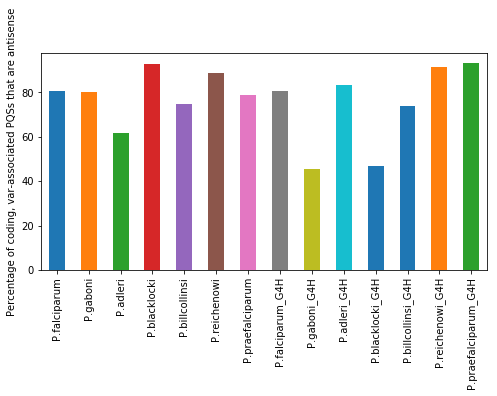

In [12]:
#Analyze bias for var-associated PQSs to be coding and antisense to the var gene
#Used in Fig 3

filtered_data_erythrocyte_associated_coding = {}
for species in filtered_data_erythrocyte_associated:
    filtered_data_erythrocyte_associated_coding.update({species: filtered_data_erythrocyte_associated[species]})
    filtered_data_erythrocyte_associated_coding[species] = filtered_data_erythrocyte_associated_coding[species][filtered_data_erythrocyte_associated_coding[species]["Coding, upstream, or downstream?"].str.contains("In")]
    
filtered_data_erythrocyte_associated_coding["P.falciparum"]
    
for species in filtered_data_erythrocyte_associated_coding:
    if "relictum" in species:
        continue
    if "gallinaceum" in species:
        continue
    if "berghei" in species:
        continue
    if "chabaudi" in species:
        continue
    count_sense = 0
    count_antisense = 0
    total_G4s = 0
    for item in list(filtered_data_erythrocyte_associated_coding[species]["Strand (cf gene or nearest gene)"]):
        if item.lower() == "sense":
            count_sense += 1
        if item.lower() == "antisense":
            count_antisense += 1
    total_erythrocyte_associated = 0
    for item in list(filtered_data_erythrocyte_associated[species]["Nearest gene ID"]):
        total_erythrocyte_associated += 1
    for item in list(data_no_telomeres[species]["Nearest gene ID"]):
        total_G4s += 1
    count_total = count_sense + count_antisense
    summary_dict = {"sense": count_sense, 
                    "antisense": count_antisense, 
                    "total": count_total, 
                    "coding, antisense var-G4 / total coding var-G4 (%)": (count_antisense / count_total) * 100, 
                    "coding, antisense var-G4 / total var-G4 (%)": (count_antisense / total_erythrocyte_associated) * 100,
                    "coding, antisense var-G4 / total G4 (%)": (count_antisense / total_G4s) * 100}
    summary_data.update({species: summary_dict})
    
print(pd.DataFrame(summary_data))
    
data_to_save = pd.DataFrame(summary_data)
data_to_save.to_csv("/Users/HunterGage/Desktop/Summary Data and Figures/var-G4 coding, antisense bias.csv")
    
plt.figure(figsize=(8,4))
ax = pd.DataFrame(summary_data).loc["coding, antisense var-G4 / total coding var-G4 (%)"].plot.bar()
ax.set_xticklabels(summary_data.keys())
ax.set_ylabel('Percentage of coding, var-associated PQSs that are antisense')
ax  


{'plus': 60, 'minus': 49, 'total': 109, 'plus (%)': 55.04587155963303, 'minus (%)': 44.95412844036697}


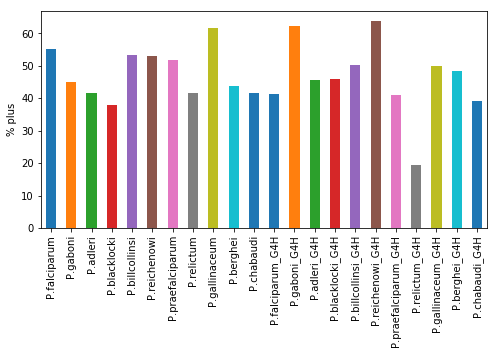

In [13]:
#Looking at associations between PQSs and + / - strands in all PQSs

summary_data = {}

for species in data_no_telomeres:
    G4_Hunter_summary_dict = {}
    QGRS_Mapper_summary_dict = {}
    G4_Hunter_plus = 0
    G4_Hunter_minus = 0
    QGRS_Mapper_plus = 0
    QGRS_Mapper_minus = 0
    G4_Hunter_total = 0
    QGRS_Mapper_total = 0
    
    if "_G4H" in species:
        for G4_score in list(data_no_telomeres[species]["SCORE"]):
            if G4_score < 0:
                G4_Hunter_minus += 1
            else:
                G4_Hunter_plus += 1
        G4_Hunter_total = G4_Hunter_plus + G4_Hunter_minus
        G4_Hunter_summary_dict = {"plus": G4_Hunter_plus, 
                                  "minus": G4_Hunter_minus, 
                                  "total": G4_Hunter_total,
                                  "plus (%)": (G4_Hunter_plus / G4_Hunter_total) * 100,
                                  "minus (%)": (G4_Hunter_minus / G4_Hunter_total) * 100}
        summary_data.update({species: G4_Hunter_summary_dict})
    else:
        for G4_chr in list(data_no_telomeres[species]["Chromosome"]):
            if "RC" in G4_chr:
                QGRS_Mapper_minus +=1
            else:
                QGRS_Mapper_plus += 1
        QGRS_Mapper_total = QGRS_Mapper_plus + QGRS_Mapper_minus
        QGRS_Mapper_summary_dict = {"plus": QGRS_Mapper_plus, 
                                    "minus": QGRS_Mapper_minus, 
                                    "total": QGRS_Mapper_total,
                                    "plus (%)": (QGRS_Mapper_plus / QGRS_Mapper_total) * 100,
                                    "minus (%)": (QGRS_Mapper_minus / QGRS_Mapper_total) * 100}
        summary_data.update({species: QGRS_Mapper_summary_dict})

    
data_to_save_G4_Hunter = pd.DataFrame(summary_data)
data_to_save_G4_Hunter.to_csv("/Users/HunterGage/Desktop/Summary Data and Figures/sense, antisense.csv")
    
print(summary_data["P.falciparum"])

plt.figure(figsize=(8,4))
ax = pd.DataFrame(summary_data).loc["plus (%)"].plot.bar()
ax.set_xticklabels(summary_data.keys())
ax.set_ylabel('% plus')
ax  

{'plus': 20, 'minus': 22, 'total': 42, 'plus (%)': 47.61904761904761, 'minus (%)': 52.38095238095239}


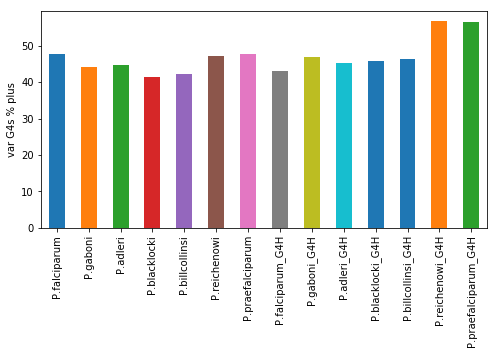

In [14]:
#Looking for associations between G4s and + / - strands in var-G4s
summary_data = {}

for species in filtered_data_erythrocyte_associated:
    G4_Hunter_summary_dict = {}
    QGRS_Mapper_summary_dict = {}
    G4_Hunter_sense = 0
    G4_Hunter_antisense = 0
    QGRS_Mapper_sense = 0
    QGRS_Mapper_antisense = 0
    G4_Hunter_total = 0
    QGRS_Mapper_total = 0
    
    if "_G4H" in species:
        for G4_score in list(filtered_data_erythrocyte_associated[species]["SCORE"]):
            if G4_score < 0:
                G4_Hunter_minus += 1
            else:
                G4_Hunter_plus += 1
        G4_Hunter_total = G4_Hunter_plus + G4_Hunter_minus
        G4_Hunter_summary_dict = {"plus": G4_Hunter_plus, 
                                  "plus": G4_Hunter_minus, 
                                  "total": G4_Hunter_total,
                                  "plus (%)": (G4_Hunter_plus / G4_Hunter_total) * 100,
                                  "minus (%)": (G4_Hunter_minus / G4_Hunter_total) * 100}
        summary_data.update({species: G4_Hunter_summary_dict})
    else:
        for G4_chr in list(filtered_data_erythrocyte_associated[species]["Chromosome"]):
            if "RC" in G4_chr:
                QGRS_Mapper_minus +=1
            else:
                QGRS_Mapper_plus += 1
        QGRS_Mapper_total = QGRS_Mapper_plus + QGRS_Mapper_minus
        QGRS_Mapper_summary_dict = {"plus": QGRS_Mapper_plus, 
                                    "minus": QGRS_Mapper_minus, 
                                    "total": QGRS_Mapper_total,
                                    "plus (%)": (QGRS_Mapper_plus / QGRS_Mapper_total) * 100,
                                    "minus (%)": (QGRS_Mapper_minus / QGRS_Mapper_total) * 100}
        summary_data.update({species: QGRS_Mapper_summary_dict})

    
data_to_save_G4_Hunter = pd.DataFrame(summary_data)
data_to_save_G4_Hunter.to_csv("/Users/HunterGage/Desktop/Summary Data and Figures/sense, antisense for var-G4s.csv")
    
print(summary_data["P.falciparum"])

plt.figure(figsize=(8,4))
ax = pd.DataFrame(summary_data).loc["plus (%)"].plot.bar()
ax.set_xticklabels(summary_data.keys())
ax.set_ylabel('var G4s % plus')
ax  

In [15]:
#Filters data for each species to only consider rows where PQS is associated with var genes
#EXLUDES repeats, telomeres, and PQSs with genes > 2kb away

summary_data = {}
filtered_data_erythrocyte_associated_no_repeats = {}
for species in filtered_data_has_gene_no_repeats:
    if "relictum" in species:
        continue
    if "gallinaceum" in species:
        continue
    filtered_data_erythrocyte_no_repeats = filtered_data_has_gene_no_repeats.get(species)[filtered_data_has_gene_no_repeats.get(species)["Gene Annotation"].str.contains("erythrocyte membrane protein")]
    filtered_data_erythrocyte_associated_no_repeats.update({species: filtered_data_erythrocyte_no_repeats})
#filtered_data_erythrocyte_associated_no_repeats["P.blacklocki_G4H"]

P.falciparum 	 var with G4: 29 	 total var genes: 105 	 proportion: 27.61904761904762
P.gaboni 	 var with G4: 9 	 total var genes: 80 	 proportion: 11.25
P.adleri 	 var with G4: 14 	 total var genes: 82 	 proportion: 17.073170731707318
P.blacklocki 	 var with G4: 8 	 total var genes: 73 	 proportion: 10.95890410958904
P.billcollinsi 	 var with G4: 22 	 total var genes: 75 	 proportion: 29.333333333333332
P.reichenowi 	 var with G4: 30 	 total var genes: 144 	 proportion: 20.833333333333336
P.praefalciparum 	 var with G4: 31 	 total var genes: 141 	 proportion: 21.98581560283688
P.falciparum_G4H 	 var with G4: 44 	 total var genes: 105 	 proportion: 41.904761904761905
P.gaboni_G4H 	 var with G4: 24 	 total var genes: 80 	 proportion: 30.0
P.adleri_G4H 	 var with G4: 36 	 total var genes: 82 	 proportion: 43.90243902439025
P.blacklocki_G4H 	 var with G4: 17 	 total var genes: 73 	 proportion: 23.28767123287671
P.billcollinsi_G4H 	 var with G4: 29 	 total var genes: 75 	 proportion: 38.66

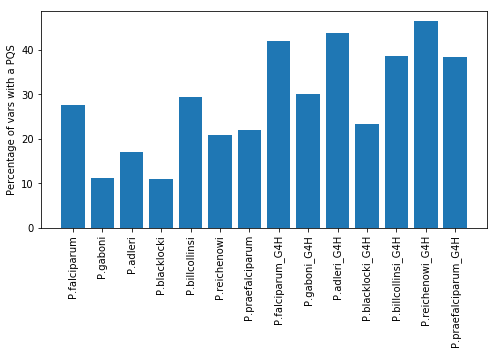

In [16]:
#In each species, do the same proportions of the total var gene family have PQSs?
#For each species, calculates percentage of vars with at least one PQS, excluding repeats
#Copy numbers of var genes from PlasmoDB
#Used in Fig 2

num_var_genes = {"P.falciparum": 105, "P.gaboni": 80, "P.adleri": 82, "P.blacklocki": 73, "P.billcollinsi": 75, "P.reichenowi": 144, "P.praefalciparum": 141}
summary_data = {}
for species in filtered_data_erythrocyte_associated_no_repeats:
    var_with_G4 = len(list(filtered_data_erythrocyte_associated_no_repeats[species]["Gene Annotation"]))
    for spp in num_var_genes:
        if spp == species.split("_")[0]:
            proportion_G4 = (var_with_G4 / num_var_genes[spp]) * 100
            print(species, "\t", "var with G4: " + str(var_with_G4), "\t", "total var genes: " + str(num_var_genes[spp]), "\t", "proportion: " + str(proportion_G4))
            summary_data.update({species: proportion_G4} )
summary_data

plt.figure(figsize=(8,4))
plt.bar(range(len(summary_data)), list(summary_data.values()), align="center")
plt.xticks(range(len(summary_data)), list(summary_data.keys()), rotation="vertical")
plt.ylabel('Percentage of vars with a PQS')
plt.show()

data_to_save = pd.DataFrame(summary_data, index=[0]).T
data_to_save.to_csv("/Users/HunterGage/Desktop/Summary Data and Figures/Proportion of vars with a G4 in each genome.csv")

In [17]:
#For each species, calculates the number of vars with at least one PQS, excluding repeats

summary_data = {}
for species in filtered_data_erythrocyte_associated_no_repeats:
    filtered_count = 0
    total_count = 0
    putative_count = 0
    for annotation in (filtered_data_erythrocyte_associated_no_repeats[species]["Gene Annotation"]):
        if "truncated" in annotation or "pseudogene" in annotation or "putative" in annotation or "exon" in annotation:
            filtered_count += 1
            if "putative" in annotation and not "pseudogene" in annotation:
                putative_count += 1
        total_count += 1
    summary_data.update({species: {"number in var-like": filtered_count, "number in var putative": putative_count, "number in all var genes": total_count}})
summary_data

{'P.falciparum': {'number in var-like': 3,
  'number in var putative': 0,
  'number in all var genes': 29},
 'P.gaboni': {'number in var-like': 9,
  'number in var putative': 9,
  'number in all var genes': 9},
 'P.adleri': {'number in var-like': 14,
  'number in var putative': 14,
  'number in all var genes': 14},
 'P.blacklocki': {'number in var-like': 8,
  'number in var putative': 8,
  'number in all var genes': 8},
 'P.billcollinsi': {'number in var-like': 20,
  'number in var putative': 20,
  'number in all var genes': 22},
 'P.reichenowi': {'number in var-like': 30,
  'number in var putative': 30,
  'number in all var genes': 30},
 'P.praefalciparum': {'number in var-like': 31,
  'number in var putative': 31,
  'number in all var genes': 31},
 'P.berghei': {'number in var-like': 0,
  'number in var putative': 0,
  'number in all var genes': 0},
 'P.chabaudi': {'number in var-like': 0,
  'number in var putative': 0,
  'number in all var genes': 0},
 'P.falciparum_G4H': {'number i

In [18]:
#For each species, calculates the number of pirs with at least one PQS, excluding repeats

summary_data = {}
for species in filtered_data_has_gene_no_repeats:
    if "relictum" not in species and "gallinaceum" not in species:
        filtered_count = 0
        total_count = 0
        putative_count = 0
        for annotation in (filtered_data_has_gene_no_repeats[species]["Gene Annotation"]):
            if "pir" in annotation.lower() or "rifin" in annotation.lower() or "stevor" in annotation.lower():
                total_count += 1
                if "truncated" in annotation or "pseudogene" in annotation or "putative" in annotation or "exon" in annotation:
                    filtered_count += 1
                    if "putative" in annotation and not "pseudogene" in annotation:
                        putative_count += 1
        summary_data.update({species: {"number in pir-like": filtered_count, "number of putative pir": putative_count, "number in all pir genes": total_count}})
summary_data

{'P.falciparum': {'number in pir-like': 0,
  'number of putative pir': 0,
  'number in all pir genes': 5},
 'P.gaboni': {'number in pir-like': 0,
  'number of putative pir': 0,
  'number in all pir genes': 0},
 'P.adleri': {'number in pir-like': 0,
  'number of putative pir': 0,
  'number in all pir genes': 0},
 'P.blacklocki': {'number in pir-like': 0,
  'number of putative pir': 0,
  'number in all pir genes': 0},
 'P.billcollinsi': {'number in pir-like': 2,
  'number of putative pir': 2,
  'number in all pir genes': 2},
 'P.reichenowi': {'number in pir-like': 0,
  'number of putative pir': 0,
  'number in all pir genes': 0},
 'P.praefalciparum': {'number in pir-like': 2,
  'number of putative pir': 2,
  'number in all pir genes': 6},
 'P.berghei': {'number in pir-like': 28,
  'number of putative pir': 0,
  'number in all pir genes': 37},
 'P.chabaudi': {'number in pir-like': 1,
  'number of putative pir': 0,
  'number in all pir genes': 11},
 'P.falciparum_G4H': {'number in pir-like

P.falciparum {'QGRS Mapper': [1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1, 2, 2, 1]}
P.gaboni {'QGRS Mapper': [1, 2, 1, 1, 1, 1, 1, 1, 1]}
P.adleri {'QGRS Mapper': [1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]}
P.blacklocki {'QGRS Mapper': [4, 1, 6, 2, 6, 6, 1, 1]}
P.billcollinsi {'QGRS Mapper': [1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 3, 1, 7, 1, 1, 2, 2, 1, 1, 1]}
P.reichenowi {'QGRS Mapper': [1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1]}
P.praefalciparum {'QGRS Mapper': [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1]}
P.falciparum_G4H {'G4 Hunter': [3, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 3, 3, 2, 4, 2, 3, 4, 2, 1, 1, 2, 4, 2, 5, 2, 1, 2, 1, 3, 1]}
P.gaboni_G4H {'G4 Hunter': [1, 4, 1, 2, 1, 2, 2, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1]}
P.adleri_G4H {'G4 Hunter': [1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 3, 4, 1, 1, 1, 2, 2, 1,

No handles with labels found to put in legend.


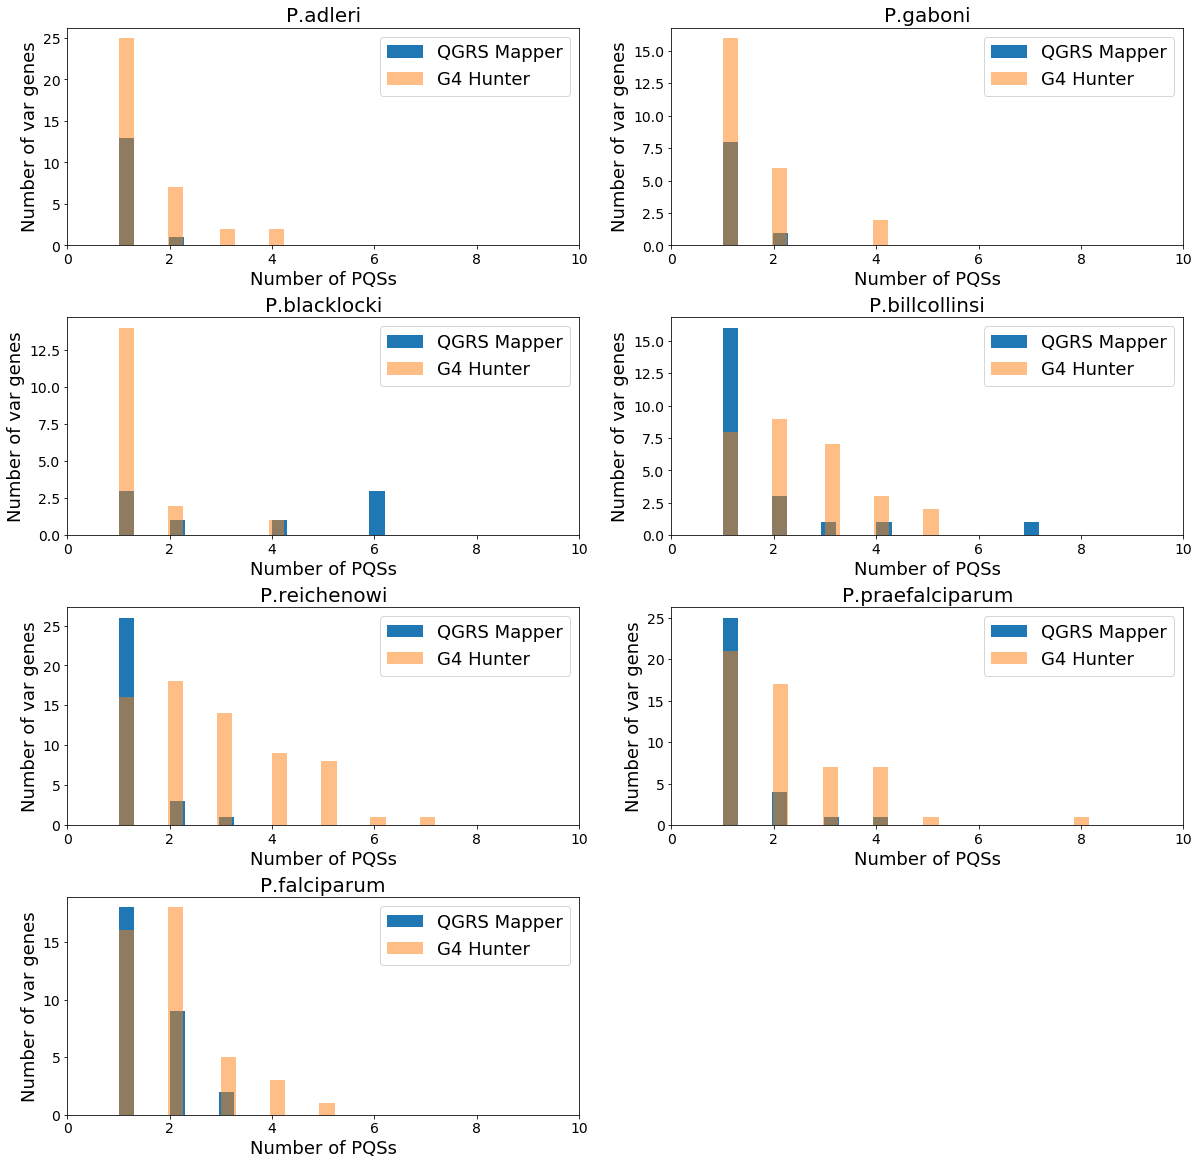

In [19]:
#Are the PQSs in vars evenly distributed among them (does every var gene have one PQS, or do some genes have lots and others, none?)
#Generates histograms depicting number of PQSs per var gene, for each species
#Used in Fig 4

overall_data = {}
for species in filtered_data_erythrocyte_associated:
    overall_dict = {}
    unique_genes = []
    for gene in list(filtered_data_erythrocyte_associated[species]["Nearest gene ID"]):
        if gene not in unique_genes:
            unique_genes.append(gene)
            overall_dict.update({gene: 1})
        elif gene in unique_genes:
            overall_dict[gene] +=1
    overall_data.update({species: overall_dict})

count_data = {}
for species in overall_data:
    counts = []
    for gene in overall_data[species]:
        counts.append(overall_data[species][gene])
    if "_G4H" in species:
        count_data.update({species: {"G4 Hunter": counts}})
    else:
        count_data.update({species: {"QGRS Mapper": counts}})
    print(species, count_data[species])

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20), subplot_kw={'xlim':(0,10)})
pd.DataFrame(count_data["P.falciparum"]).plot.hist(ax=axes[3, 0], bins=50, legend=None, label="QGRS Mapper", width=0.3)
pd.DataFrame(count_data["P.gaboni"]).plot.hist(ax=axes[0, 1], bins=50, label="QGRS Mapper", width=0.3)
pd.DataFrame(count_data["P.adleri"]).plot.hist(ax=axes[0, 0], bins=50, label="QGRS Mapper", width=0.3)
pd.DataFrame(count_data["P.blacklocki"]).plot.hist(ax=axes[1, 0], bins=50, label="QGRS Mapper", width=0.3)
pd.DataFrame(count_data["P.billcollinsi"]).plot.hist(ax=axes[1, 1], bins=50, label="QGRS Mapper", width=0.3)
pd.DataFrame(count_data["P.reichenowi"]).plot.hist(ax=axes[2, 0], bins=50, label="QGRS Mapper", width=0.3)
pd.DataFrame(count_data["P.praefalciparum"]).plot.hist(ax=axes[2, 1], bins=50, label="QGRS Mapper", width=0.3)
pd.DataFrame(count_data["P.falciparum_G4H"]).plot.hist(ax=axes[3, 0], bins=50, label="G4 Hunter", alpha=0.5, width=0.3, legend=None)
pd.DataFrame(count_data["P.gaboni_G4H"]).plot.hist(ax=axes[0, 1], bins=50, label="G4 Hunter", alpha=0.5, width=0.3)
pd.DataFrame(count_data["P.adleri_G4H"]).plot.hist(ax=axes[0, 0], bins=50, label="G4 Hunter", alpha=0.5, width=0.3)
pd.DataFrame(count_data["P.blacklocki_G4H"]).plot.hist(ax=axes[1, 0], bins=50, label="G4 Hunter", alpha=0.5, width=0.3)
pd.DataFrame(count_data["P.billcollinsi_G4H"]).plot.hist(ax=axes[1, 1], bins=50, label="G4 Hunter", alpha=0.5, width=0.3)
pd.DataFrame(count_data["P.reichenowi_G4H"]).plot.hist(ax=axes[2, 0], bins=50, label="G4 Hunter", alpha=0.5, width=0.3)
pd.DataFrame(count_data["P.praefalciparum_G4H"]).plot.hist(ax=axes[2, 1], bins=50, label="G4 Hunter", alpha=0.5, width=0.3)

axes[0, 0].set_title("P.adleri", fontsize=20)
axes[0, 1].set_title("P.gaboni", fontsize=20)
axes[1, 0].set_title("P.blacklocki", fontsize=20)
axes[1, 1].set_title("P.billcollinsi", fontsize=20)
axes[2, 0].set_title("P.reichenowi", fontsize=20)
axes[2, 1].set_title("P.praefalciparum", fontsize=20)
axes[3, 0].set_title("P.falciparum", fontsize=20)

j = 0
k = 0
i = 1
while j <= 3:
    axes[j, 0].set_ylabel("Number of var genes", fontsize=18)
    axes[j, 1].set_ylabel("Number of var genes", fontsize=18)
    axes[j, 0].legend(loc="upper right", fontsize=18)
    axes[j, 1].legend(loc="upper right", fontsize=18)
    axes[j, 0].tick_params(labelsize=14)
    axes[j, 1].tick_params(labelsize=14)
    j += 1

j = 0
while j <= 3:
    axes[j, 0].set_xlabel("Number of PQSs", fontsize=18)
    axes[j, 1].set_xlabel("Number of PQSs", fontsize=18)
    axes[j, 0].tick_params(labelsize=14)
    axes[j, 1].tick_params(labelsize=14)
    j += 1

fig.delaxes(axes[3,1])
plt.subplots_adjust(hspace=0.33, wspace=0.18)

pdf = PdfPages('per-var distribution of G4s.pdf')
pdf.savefig()
pdf.close()

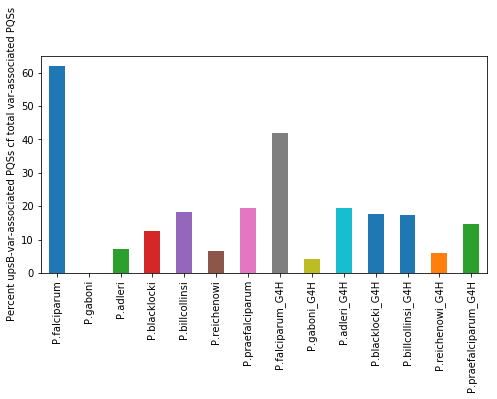

In [20]:
#Look for large group of var gene promoter-upsB G4s found in the original Smargiasso 2009 paper
#Filters data by finding PQSs associated with upsB var genes (annotated by hand); repeats included
#Parse out the upsB-var-associated PQSs cf total var-associated PQSs, and see how this apportionment varies with speices
#Excludes repeats
#Used in Additional File 4, Fig S1

filtered_data_erythrocyte_upsB = {}
for species in filtered_data_erythrocyte_associated:
    filtered_data = filtered_data_erythrocyte_associated[species][filtered_data_erythrocyte_associated[species]["upsB?"].str.contains("Yes")]
    filtered_data_erythrocyte_upsB.update({species: filtered_data})

summary_data = {}
# count and proportion of upsB-var G4s excludes repeats
for species in filtered_data_erythrocyte_upsB:
    unique_upsB_varG4_list = []
    unique_varG4_list = []
    for G4 in list(filtered_data_erythrocyte_upsB[species]["Nearest gene ID"]):
        if G4 not in unique_upsB_varG4_list:
            unique_upsB_varG4_list.append(G4)
    unique_upsB_varG4 = len(unique_upsB_varG4_list)
    for G4 in list(filtered_data_erythrocyte_associated[species]["Nearest gene ID"]):
        if G4 not in unique_varG4_list:
            unique_varG4_list.append(G4)
    unique_varG4 = len(unique_varG4_list)
    proportion = (unique_upsB_varG4 / unique_varG4) * 100
    summary_dict = {"upsB var G4": unique_upsB_varG4, "total var G4": unique_varG4, "proportion": proportion}
    summary_data.update({species: summary_dict})

plt.figure(figsize=(8,4))
ax = pd.DataFrame(summary_data).loc["proportion"].plot.bar()
ax.set_xticklabels(summary_data.keys())
ax.set_ylabel('Percent upsB-var-associated PQSs cf total var-associated PQSs')
ax

data_to_save = pd.DataFrame(summary_data)
data_to_save.to_csv("/Users/HunterGage/Desktop/Summary Data and Figures/upsB-var-G4s.csv")

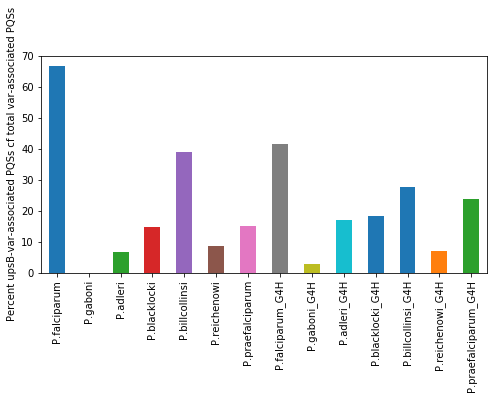

In [21]:
#Look for upsB-var-associated PQSs in each species
#Includes repeats

summary_data = {}
for species in filtered_data_erythrocyte_upsB:
    upsB_var_G4s = len(list(filtered_data_erythrocyte_upsB[species]["Nearest gene ID"]))
    total_var_G4s = len(list(filtered_data_erythrocyte_associated[species]["Nearest gene ID"]))
    proportion = (upsB_var_G4s / total_var_G4s) * 100
    summary_dict = {"upsB var G4": upsB_var_G4s, "total var G4": total_var_G4s, "proportion": proportion}
    summary_data.update({species: summary_dict})

plt.figure(figsize=(8,4))
ax = pd.DataFrame(summary_data).loc["proportion"].plot.bar()
ax.set_xticklabels(summary_data.keys())
ax.set_ylabel('Percent upsB-var-associated PQSs cf total var-associated PQSs')
ax

data_to_save = pd.DataFrame(summary_data)
data_to_save.to_csv("/Users/HunterGage/Desktop/Summary Data and Figures/upsB-var-G4s_repeats_incldued.csv")

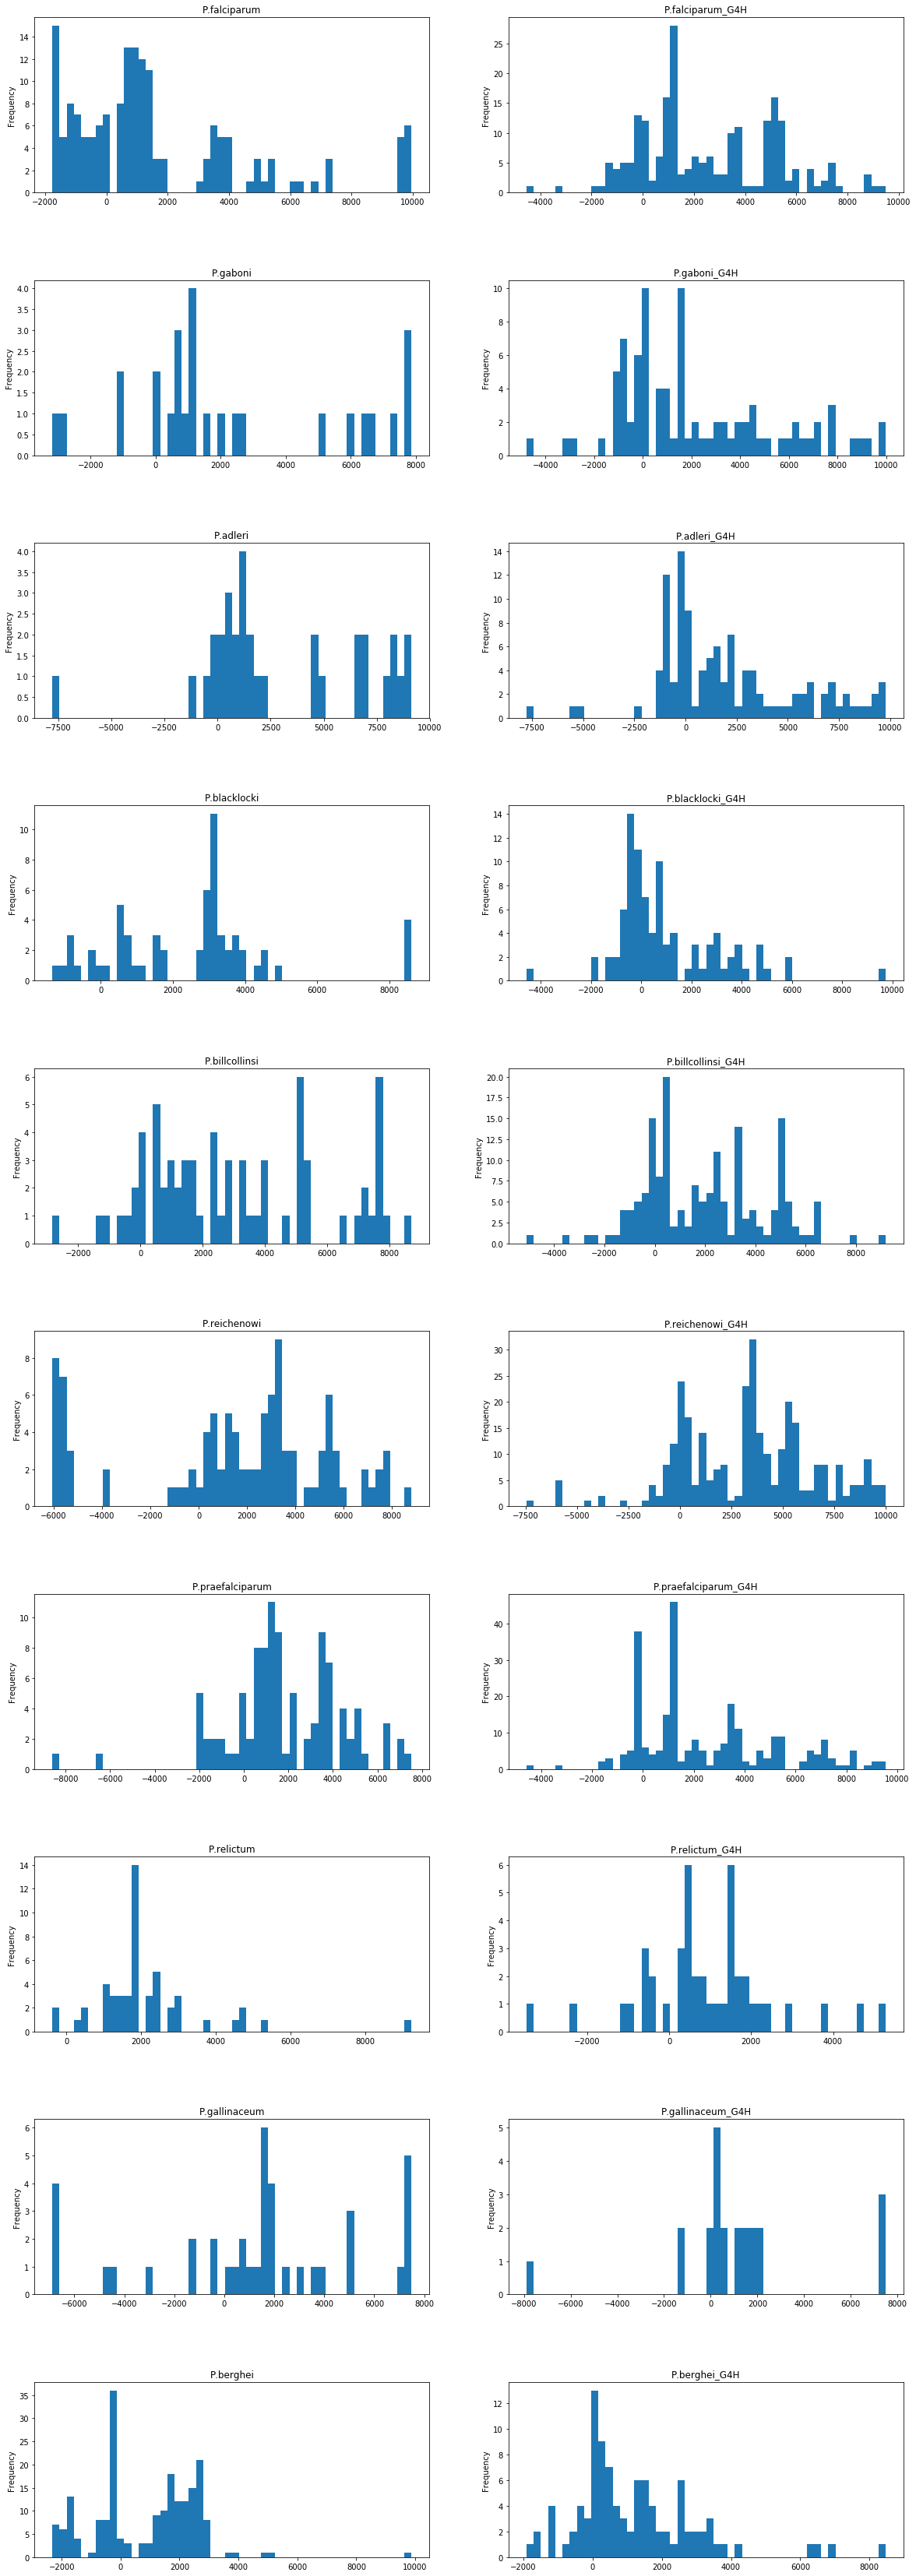

In [22]:
#Distribution of PQSs compared to the start codon of the gene they are nearest to

Pfalciparum_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.falciparum_QGRSMapper_codon.csv")
Padleri_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.adleri_QGRSMapper_codon.csv")
Pgaboni_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.gaboni_QGRSMapper_codon.csv")
Pblacklocki_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.blacklocki_QGRSMapper_codon.csv")
Pbillcollinsi_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.billcollinsi_QGRSMapper_codon.csv")
Preichenowi_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.reichenowi_QGRSMapper_codon.csv")
Ppraefalciparum_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.praefalciparum_QGRSMapper_codon.csv")
Prelictum_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.relictum_QGRSMapper_codon.csv")
Pgallinaceum_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.gallinaceum_QGRSMapper_codon.csv")
Pberghei_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.berghei_QGRSMapper_codon.csv")

Pfalciparum_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.falciparum_G4Hunter_codon.csv")
Pgaboni_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.gaboni_G4Hunter_codon.csv")
Padleri_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.adleri_G4Hunter_codon.csv")
Pblacklocki_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.blacklocki_G4Hunter_codon.csv")
Pbillcollinsi_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.billcollinsi_G4Hunter_codon.csv")
Preichenowi_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.reichenowi_G4Hunter_codon.csv")
Ppraefalciparum_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.praefalciparum_G4Hunter_codon.csv")
Prelictum_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.relictum_G4Hunter_codon.csv")
Pgallinaceum_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.gallinaceum_G4Hunter_codon.csv")
Pberghei_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.berghei_G4Hunter_codon.csv")



distributions = {"P.falciparum": Pfalciparum_distribution, "P.adleri": Padleri_distribution, "P.gaboni": Pgaboni_distribution, "P.blacklocki": Pblacklocki_distribution, "P.billcollinsi": Pbillcollinsi_distribution, "P.reichenowi": Preichenowi_distribution, "P.praefalciparum": Ppraefalciparum_distribution, "P.relictum": Prelictum_distribution, "P.gallinaceum": Pgallinaceum_distribution, "P.berghei": Pberghei_distribution, "P.falciparum_G4H": Pfalciparum_G4H_distribution, "P.gaboni_G4H": Pgaboni_G4H_distribution, "P.adleri_G4H": Padleri_G4H_distribution, "P.billcollinsi_G4H": Pbillcollinsi_G4H_distribution, "P.blacklocki_G4H": Pblacklocki_G4H_distribution, "P.reichenowi_G4H": Preichenowi_G4H_distribution, "P.praefalciparum_G4H": Ppraefalciparum_G4H_distribution, "P.relictum_G4H": Prelictum_G4H_distribution, "P.gallinaceum_G4H": Pgallinaceum_G4H_distribution, "P.berghei_G4H": Pberghei_G4H_distribution}

filtered_distributions = {}
for species in distributions:
    filtered_distribution = distributions[species][~distributions[species]["Position in gene"].astype(str).str.contains("None")]
    filtered_distribution = filtered_distribution[filtered_distribution["Position in gene"].astype(int).abs() <= 10000]
    filtered_distribution["Position in gene"] = pd.to_numeric(filtered_distribution["Position in gene"])
    filtered_distributions.update({species: filtered_distribution})

#can adjust ylim for all subplots using subplot_kw={'ylim':(0,40)}
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20,60))

filtered_distributions["P.falciparum"]["Position in gene"].plot.hist(ax=axes[0, 0], bins=50)
filtered_distributions["P.gaboni"]["Position in gene"].plot.hist(ax=axes[1, 0], bins=50)
filtered_distributions["P.adleri"]["Position in gene"].plot.hist(ax=axes[2, 0], bins=50)
filtered_distributions["P.blacklocki"]["Position in gene"].plot.hist(ax=axes[3, 0], bins=50)
filtered_distributions["P.billcollinsi"]["Position in gene"].plot.hist(ax=axes[4, 0], bins=50)
filtered_distributions["P.reichenowi"]["Position in gene"].plot.hist(ax=axes[5, 0], bins=50)
filtered_distributions["P.praefalciparum"]["Position in gene"].plot.hist(ax=axes[6, 0], bins=50)
filtered_distributions["P.relictum"]["Position in gene"].plot.hist(ax=axes[7, 0], bins=50)
filtered_distributions["P.gallinaceum"]["Position in gene"].plot.hist(ax=axes[8, 0], bins=50)
filtered_distributions["P.berghei"]["Position in gene"].plot.hist(ax=axes[9, 0], bins=50)
filtered_distributions["P.falciparum_G4H"]["Position in gene"].plot.hist(ax=axes[0, 1], bins=50)
filtered_distributions["P.gaboni_G4H"]["Position in gene"].plot.hist(ax=axes[1, 1], bins=50)
filtered_distributions["P.adleri_G4H"]["Position in gene"].plot.hist(ax=axes[2, 1], bins=50)
filtered_distributions["P.blacklocki_G4H"]["Position in gene"].plot.hist(ax=axes[3, 1], bins=50)
filtered_distributions["P.billcollinsi_G4H"]["Position in gene"].plot.hist(ax=axes[4, 1], bins=50)
filtered_distributions["P.reichenowi_G4H"]["Position in gene"].plot.hist(ax=axes[5, 1], bins=50)
filtered_distributions["P.praefalciparum_G4H"]["Position in gene"].plot.hist(ax=axes[6, 1], bins=50)
filtered_distributions["P.relictum_G4H"]["Position in gene"].plot.hist(ax=axes[7, 1], bins=50)
filtered_distributions["P.gallinaceum_G4H"]["Position in gene"].plot.hist(ax=axes[8, 1], bins=50)
filtered_distributions["P.berghei_G4H"]["Position in gene"].plot.hist(ax=axes[9, 1], bins=50)

axes[0, 0].set_title("P.falciparum")
axes[1, 0].set_title("P.gaboni")
axes[2, 0].set_title("P.adleri")
axes[3, 0].set_title("P.blacklocki")
axes[4, 0].set_title("P.billcollinsi")
axes[5, 0].set_title("P.reichenowi")
axes[6, 0].set_title("P.praefalciparum")
axes[7, 0].set_title("P.relictum")
axes[8, 0].set_title("P.gallinaceum")
axes[9, 0].set_title("P.berghei")
axes[0, 1].set_title("P.falciparum_G4H")
axes[1, 1].set_title("P.gaboni_G4H")
axes[2, 1].set_title("P.adleri_G4H")
axes[3, 1].set_title("P.blacklocki_G4H")
axes[4, 1].set_title("P.billcollinsi_G4H")
axes[5, 1].set_title("P.reichenowi_G4H")
axes[6, 1].set_title("P.praefalciparum_G4H")
axes[7, 1].set_title("P.relictum_G4H")
axes[8, 1].set_title("P.gallinaceum_G4H")
axes[9, 1].set_title("P.berghei_G4H")

plt.subplots_adjust(hspace=0.5, wspace=0.2)     

pdf = PdfPages('distributions of all G4s.pdf')
pdf.savefig()
pdf.close()
    

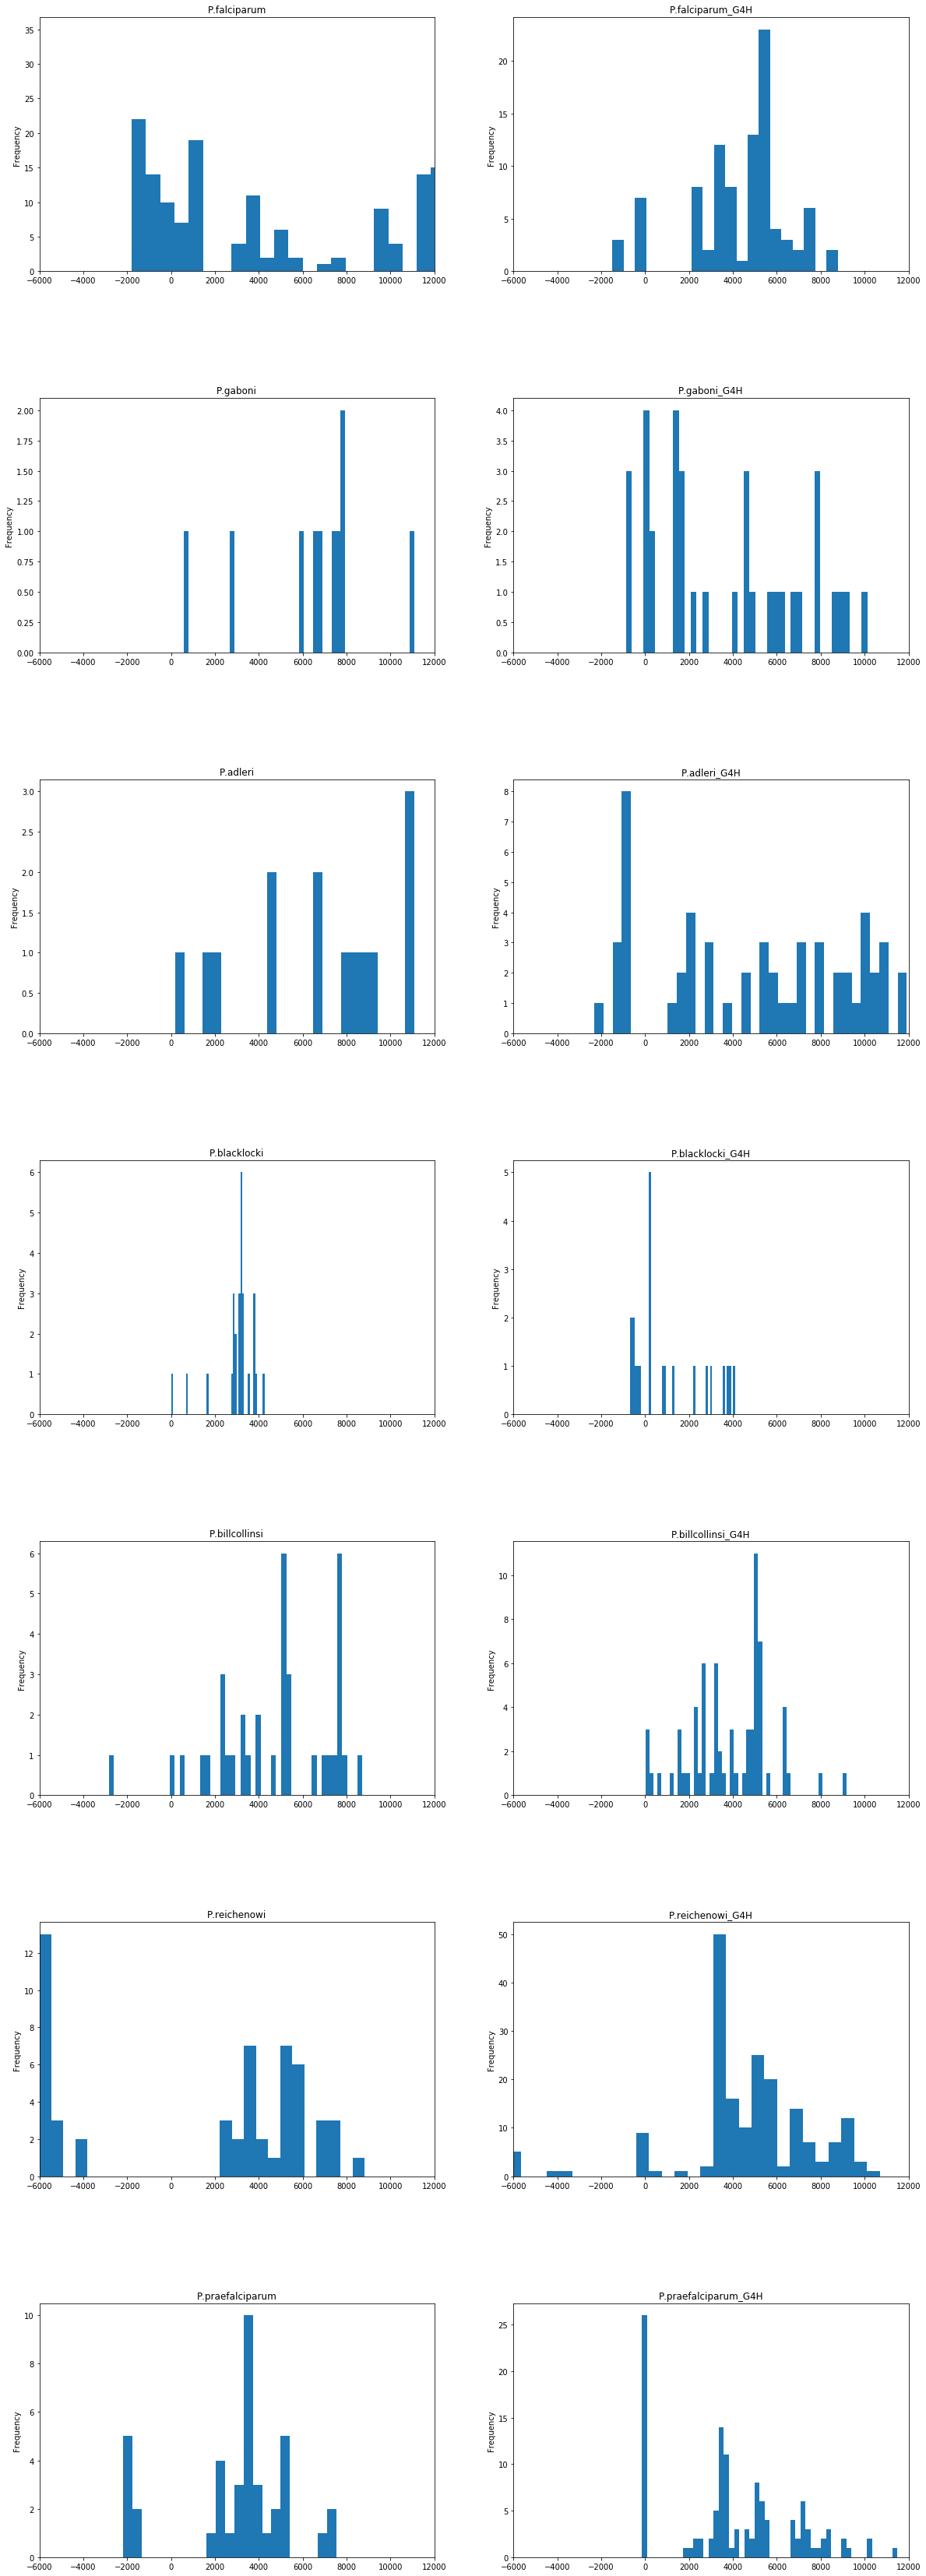

In [23]:
#Distribution of PQSs compared to the start codon of the var gene they are associated with

Pfalciparum_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.falciparum_QGRSMapper_codon.csv")
Padleri_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.adleri_QGRSMapper_codon.csv")
Pgaboni_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.gaboni_QGRSMapper_codon.csv")
Pblacklocki_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.blacklocki_QGRSMapper_codon.csv")
Pbillcollinsi_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.billcollinsi_QGRSMapper_codon.csv")
Preichenowi_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.reichenowi_QGRSMapper_codon.csv")
Ppraefalciparum_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.praefalciparum_QGRSMapper_codon.csv")
Prelictum_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.relictum_QGRSMapper_codon.csv")
Pgallinaceum_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.gallinaceum_QGRSMapper_codon.csv")
Pberghei_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.berghei_QGRSMapper_codon.csv")

Pfalciparum_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.falciparum_G4Hunter_codon.csv")
Pgaboni_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.gaboni_G4Hunter_codon.csv")
Padleri_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.adleri_G4Hunter_codon.csv")
Pblacklocki_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.blacklocki_G4Hunter_codon.csv")
Pbillcollinsi_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.billcollinsi_G4Hunter_codon.csv")
Preichenowi_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.reichenowi_G4Hunter_codon.csv")
Ppraefalciparum_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.praefalciparum_G4Hunter_codon.csv")
Prelictum_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.relictum_G4Hunter_codon.csv")
Pgallinaceum_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.gallinaceum_G4Hunter_codon.csv")
Pberghei_G4H_distribution = pd.read_csv("/Users/HunterGage/Desktop/G4 Positions Relative to Start Codon/P.berghei_G4Hunter_codon.csv")

distributions = {"P.falciparum": Pfalciparum_distribution, "P.adleri": Padleri_distribution, "P.gaboni": Pgaboni_distribution, "P.blacklocki": Pblacklocki_distribution, "P.billcollinsi": Pbillcollinsi_distribution, "P.reichenowi": Preichenowi_distribution, "P.praefalciparum": Ppraefalciparum_distribution, "P.falciparum_G4H": Pfalciparum_G4H_distribution, "P.gaboni_G4H": Pgaboni_G4H_distribution, "P.adleri_G4H": Padleri_G4H_distribution, "P.billcollinsi_G4H": Pbillcollinsi_G4H_distribution, "P.blacklocki_G4H": Pblacklocki_G4H_distribution, "P.reichenowi_G4H": Preichenowi_G4H_distribution, "P.praefalciparum_G4H": Ppraefalciparum_G4H_distribution}

filtered_var_distributions = {}
for species in distributions:
    filtered_var_distribution = distributions[species][~distributions[species]["Position in gene"].astype(str).str.contains("None")]
    filtered_var_distribution = filtered_var_distribution[filtered_var_distribution["Gene Annotation"].str.contains("erythrocyte membrane protein")]
    filtered_var_distribution = filtered_var_distribution[filtered_var_distribution["Position in gene"].astype(int).abs() <= 20000]
    filtered_var_distribution["Position in gene"] = pd.to_numeric(filtered_var_distribution["Position in gene"])
    filtered_var_distributions.update({species: filtered_var_distribution})

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20,60), subplot_kw={'xlim':(-6000,12000)})

filtered_var_distributions["P.falciparum"]["Position in gene"].plot.hist(ax=axes[0, 0], bins=50)
filtered_var_distributions["P.gaboni"]["Position in gene"].plot.hist(ax=axes[1, 0], bins=50)
filtered_var_distributions["P.adleri"]["Position in gene"].plot.hist(ax=axes[2, 0], bins=50)
filtered_var_distributions["P.blacklocki"]["Position in gene"].plot.hist(ax=axes[3, 0], bins=50)
filtered_var_distributions["P.billcollinsi"]["Position in gene"].plot.hist(ax=axes[4, 0], bins=50)
filtered_var_distributions["P.reichenowi"]["Position in gene"].plot.hist(ax=axes[5, 0], bins=50)
filtered_var_distributions["P.praefalciparum"]["Position in gene"].plot.hist(ax=axes[6, 0], bins=50)
filtered_var_distributions["P.falciparum_G4H"]["Position in gene"].plot.hist(ax=axes[0, 1], bins=50)
filtered_var_distributions["P.gaboni_G4H"]["Position in gene"].plot.hist(ax=axes[1, 1], bins=50)
filtered_var_distributions["P.adleri_G4H"]["Position in gene"].plot.hist(ax=axes[2, 1], bins=50)
filtered_var_distributions["P.blacklocki_G4H"]["Position in gene"].plot.hist(ax=axes[3, 1], bins=50)
filtered_var_distributions["P.billcollinsi_G4H"]["Position in gene"].plot.hist(ax=axes[4, 1], bins=50)
filtered_var_distributions["P.reichenowi_G4H"]["Position in gene"].plot.hist(ax=axes[5, 1], bins=50)
filtered_var_distributions["P.praefalciparum_G4H"]["Position in gene"].plot.hist(ax=axes[6, 1], bins=50)

axes[0, 0].set_title("P.falciparum")
axes[1, 0].set_title("P.gaboni")
axes[2, 0].set_title("P.adleri")
axes[3, 0].set_title("P.blacklocki")
axes[4, 0].set_title("P.billcollinsi")
axes[5, 0].set_title("P.reichenowi")
axes[6, 0].set_title("P.praefalciparum")
axes[0, 1].set_title("P.falciparum_G4H")
axes[1, 1].set_title("P.gaboni_G4H")
axes[2, 1].set_title("P.adleri_G4H")
axes[3, 1].set_title("P.blacklocki_G4H")
axes[4, 1].set_title("P.billcollinsi_G4H")
axes[5, 1].set_title("P.reichenowi_G4H")
axes[6, 1].set_title("P.praefalciparum_G4H")

plt.subplots_adjust(hspace=0.5, wspace=0.2)     

pdf = PdfPages('distributions of var-G4s.pdf')
pdf.savefig()
pdf.close()
    

No handles with labels found to put in legend.


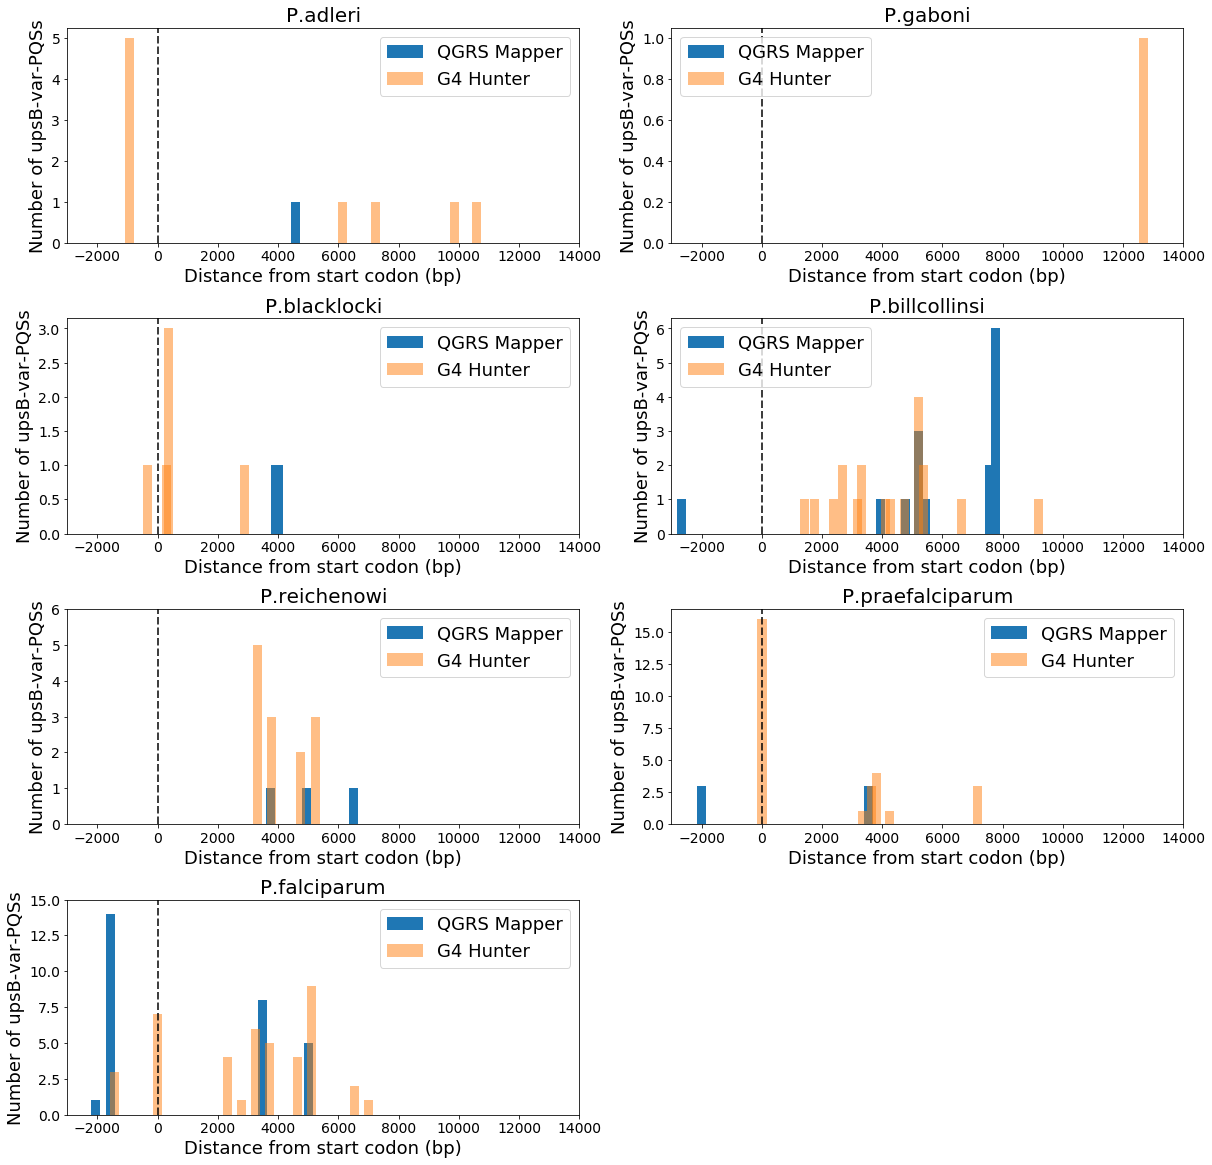

In [24]:
#Distribution of PQSs compared to the start codon of the upsB-var gene they are associated with
#Only includes PQSs within 20 kb of the start codon of the upsB-var gene they are associated with
#Used in Fig 5

filtered_upsB_var_distributions = {}
for species in filtered_var_distributions:
    species_upsB_genes = list(filtered_data_erythrocyte_upsB[species]["Nearest gene ID"])
    filtered_upsB_var_distribution = filtered_var_distributions[species][filtered_var_distributions[species]["Nearest gene ID"].isin(species_upsB_genes)]
    filtered_upsB_var_distributions.update({species: filtered_upsB_var_distribution})
    
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20), subplot_kw={'xlim':(-3000,14000)})

filtered_upsB_var_distributions["P.falciparum"]["Position in gene"].plot.hist(ax=axes[3, 0], bins=50, ylim={0,15}, label="QGRS Mapper", width=300)
dummy_dict = {"QGRS Mapper": 0}
pd.DataFrame(dummy_dict, index=[0]).plot.hist(ax=axes[0,1], label="QGRS Mapper")
filtered_upsB_var_distributions["P.adleri"]["Position in gene"].plot.hist(ax=axes[0, 0], bins=50, label="QGRS Mapper", width=300)
filtered_upsB_var_distributions["P.blacklocki"]["Position in gene"].plot.hist(ax=axes[1, 0], bins=50, label="QGRS Mapper", width=300)
filtered_upsB_var_distributions["P.billcollinsi"]["Position in gene"].plot.hist(ax=axes[1, 1], bins=50, label="QGRS Mapper", width=300)
filtered_upsB_var_distributions["P.reichenowi"]["Position in gene"].plot.hist(ax=axes[2, 0], bins=50, label="QGRS Mapper", width=300)
filtered_upsB_var_distributions["P.praefalciparum"]["Position in gene"].plot.hist(ax=axes[2, 1], bins=50, label="QGRS Mapper", width=300)
filtered_upsB_var_distributions["P.falciparum_G4H"]["Position in gene"].plot.hist(ax=axes[3, 0], bins=50, alpha=0.5, label="G4 Hunter", width=300)
filtered_upsB_var_distributions["P.gaboni_G4H"]["Position in gene"].plot.hist(ax=axes[0, 1], bins=50, width=300, alpha=0.5, label="G4 Hunter")
filtered_upsB_var_distributions["P.adleri_G4H"]["Position in gene"].plot.hist(ax=axes[0, 0], bins=50, alpha=0.5, label="G4 Hunter", width=300)
filtered_upsB_var_distributions["P.blacklocki_G4H"]["Position in gene"].plot.hist(ax=axes[1, 0], bins=50, alpha=0.5, label="G4 Hunter", width=300)
filtered_upsB_var_distributions["P.billcollinsi_G4H"]["Position in gene"].plot.hist(ax=axes[1, 1], bins=50, alpha=0.5, label="G4 Hunter", width=300)
filtered_upsB_var_distributions["P.reichenowi_G4H"]["Position in gene"].plot.hist(ax=axes[2, 0], bins=50, alpha=0.5, ylim={0,6}, label="G4 Hunter", width=300)
filtered_upsB_var_distributions["P.praefalciparum_G4H"]["Position in gene"].plot.hist(ax=axes[2, 1], bins=50, alpha=0.5, label="G4 Hunter", width=300)

axes[0, 0].set_title("P.adleri", fontsize=20)
axes[0, 1].set_title("P.gaboni", fontsize=20)
axes[1, 0].set_title("P.blacklocki", fontsize=20)
axes[1, 1].set_title("P.billcollinsi", fontsize=20)
axes[2, 0].set_title("P.reichenowi", fontsize=20)
axes[2, 1].set_title("P.praefalciparum", fontsize=20)
axes[3, 0].set_title("P.falciparum", fontsize=20)

j = 0
while j <= 3:
    axes[j, 0].set_ylabel("Number of upsB-var-PQSs", fontsize=18)
    axes[j, 0].axvline(ymin=0, ymax=20, dashes=(5,2), color="black")
    axes[j, 1].set_ylabel("Number of upsB-var-PQSs", fontsize=18)
    axes[j, 1].axvline(ymin=0, ymax=20, dashes=(5,2), color="black")
    axes[j, 0].legend(loc="upper right", fontsize=18)
    axes[j, 1].legend(loc="upper right", fontsize=18)
    axes[j,0].tick_params(labelsize=14)
    axes[j,1].tick_params(labelsize=14)
    j += 1

j = 0
while j <= 3:
    axes[j, 0].set_xlabel("Distance from start codon (bp)", fontsize=18)
    axes[j, 1].set_xlabel("Distance from start codon (bp)", fontsize=18)
    j += 1

axes[0,1].legend(loc="upper left", fontsize=18)
axes[1,1].legend(loc="upper left", fontsize=18)
fig.delaxes(axes[3,1])
plt.subplots_adjust(hspace=0.35, wspace=0.18)     

pdf = PdfPages('distributions of upsB-var G4s.pdf')
pdf.savefig()
pdf.close()
    

In [25]:
#Finds PQSs associated with pir, stevor, rifin, phist, surfin, clag, fam-e, fam-f, fam-g, fam-h, fam-i family genes in all of the species and filters into DataFrames
#Excludes telomeres
#Includes repeats (multiple PQS with same gene ID)

filtered_data_pir_stevor_rifin_PHIST_SURFIN = {}
for species in filtered_data_has_gene:
    filtered_data_families = filtered_data_has_gene.get(species)[(filtered_data_has_gene.get(species)['Gene Annotation'].str.contains("PIR")) 
                                                                 | (filtered_data_has_gene.get(species)['Gene Annotation'].str.contains("stevor")) 
                                                                 | (filtered_data_has_gene.get(species)['Gene Annotation'].str.contains("rifin")) 
                                                                 | (filtered_data_has_gene.get(species)['Gene Annotation'].str.contains("PHIST")) 
                                                                 | (filtered_data_has_gene.get(species)['Gene Annotation'].str.contains("SURFIN")) 
                                                                 | (filtered_data_has_gene.get(species)['Gene Annotation'].str.contains("cytoadherence")) 
                                                                 | (filtered_data_has_gene.get(species)['Gene Annotation'].str.contains("reticulocyte binding")) 
                                                                 | (filtered_data_has_gene.get(species)['Gene Annotation'].str.contains("fam-e")) 
                                                                 | (filtered_data_has_gene.get(species)['Gene Annotation'].str.contains("fam-f"))
                                                                 | (filtered_data_has_gene.get(species)['Gene Annotation'].str.contains("fam-g"))
                                                                 | (filtered_data_has_gene.get(species)['Gene Annotation'].str.contains("fam-h"))
                                                                 | (filtered_data_has_gene.get(species)['Gene Annotation'].str.contains("fam-i"))
                                                                 | (filtered_data_has_gene.get(species)['Gene Annotation'].str.contains("early transcribed membrane protein"))]
    filtered_data_pir_stevor_rifin_PHIST_SURFIN.update({species: filtered_data_families})

#for data in filtered_data_pir_stevor_rifin_PHIST_SURFIN:
    #print(data)
    #display(filtered_data_pir_stevor_rifin_PHIST_SURFIN[data])

P.falciparum total 227 count 5
P.gaboni total 28 count 0
P.adleri total 51 count 0
P.blacklocki total 40 count 0
P.billcollinsi total 362 count 2
P.reichenowi total 520 count 0
P.praefalciparum total 680 count 3
P.relictum total 5 count 0
P.gallinaceum total 22 count 0
P.berghei total 217 count 35
P.chabaudi total 208 count 11
P.falciparum_G4H total 227 count 1
P.gaboni_G4H total 28 count 0
P.adleri_G4H total 51 count 0
P.blacklocki_G4H total 40 count 1
P.billcollinsi_G4H total 362 count 15
P.reichenowi_G4H total 520 count 12
P.praefalciparum_G4H total 680 count 0
P.relictum_G4H total 5 count 0
P.gallinaceum_G4H total 22 count 0
P.berghei_G4H total 217 count 1
P.chabaudi_G4H total 208 count 4


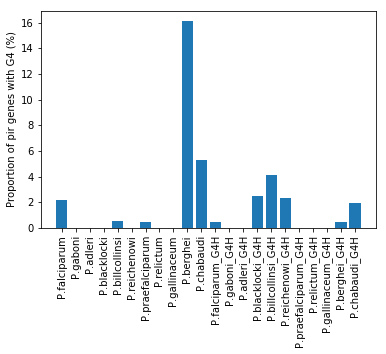

P.falciparum total 42 count 0
P.gaboni total 11 count 0
P.adleri total 29 count 0
P.blacklocki total 11 count 0
P.billcollinsi total 38 count 0
P.reichenowi total 52 count 0
P.praefalciparum total 28 count 0
P.falciparum_G4H total 42 count 0
P.gaboni_G4H total 11 count 0
P.adleri_G4H total 29 count 0
P.blacklocki_G4H total 11 count 0
P.billcollinsi_G4H total 38 count 0
P.reichenowi_G4H total 52 count 0
P.praefalciparum_G4H total 28 count 0


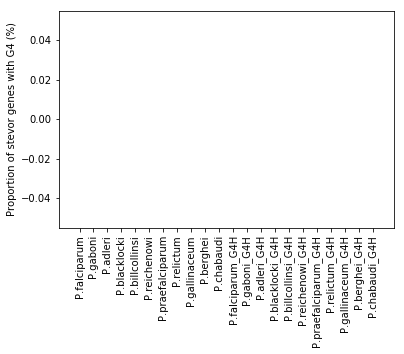

P.falciparum total 185 count 5
P.gaboni total 16 count 0
P.adleri total 19 count 0
P.blacklocki total 12 count 0
P.billcollinsi total 253 count 2
P.reichenowi total 424 count 0
P.praefalciparum total 141 count 3
P.falciparum_G4H total 185 count 1
P.gaboni_G4H total 16 count 0
P.adleri_G4H total 19 count 0
P.blacklocki_G4H total 12 count 1
P.billcollinsi_G4H total 253 count 15
P.reichenowi_G4H total 424 count 12
P.praefalciparum_G4H total 141 count 0


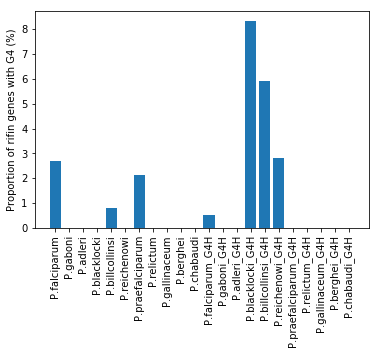

P.falciparum total 54 count 1
P.gaboni total 8 count 0
P.adleri total 9 count 0
P.blacklocki total 13 count 0
P.billcollinsi total 5 count 0
P.reichenowi total 5 count 0
P.praefalciparum total 13 count 0
P.relictum total 4 count 0
P.gallinaceum total 6 count 0
P.berghei total 4 count 0
P.chabaudi total 3 count 0
P.falciparum_G4H total 54 count 1
P.gaboni_G4H total 8 count 1
P.adleri_G4H total 9 count 2
P.blacklocki_G4H total 13 count 0
P.billcollinsi_G4H total 5 count 1
P.reichenowi_G4H total 5 count 0
P.praefalciparum_G4H total 13 count 1
P.relictum_G4H total 4 count 0
P.gallinaceum_G4H total 6 count 0
P.berghei_G4H total 4 count 0
P.chabaudi_G4H total 3 count 0


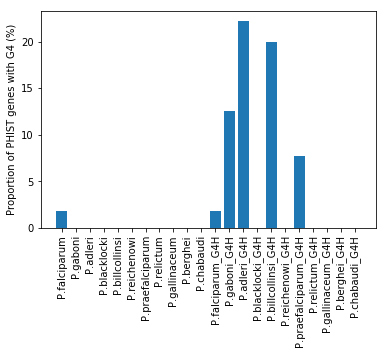

P.falciparum total 11 count 0
P.gaboni total 5 count 0
P.adleri total 5 count 0
P.blacklocki total 2 count 0
P.billcollinsi total 5 count 0
P.reichenowi total 5 count 0
P.praefalciparum total 7 count 0
P.relictum total 50 count 0
P.gallinaceum total 79 count 2
P.falciparum_G4H total 11 count 0
P.gaboni_G4H total 5 count 0
P.adleri_G4H total 5 count 0
P.blacklocki_G4H total 2 count 0
P.billcollinsi_G4H total 5 count 0
P.reichenowi_G4H total 5 count 0
P.praefalciparum_G4H total 7 count 0
P.relictum_G4H total 50 count 0
P.gallinaceum_G4H total 79 count 1


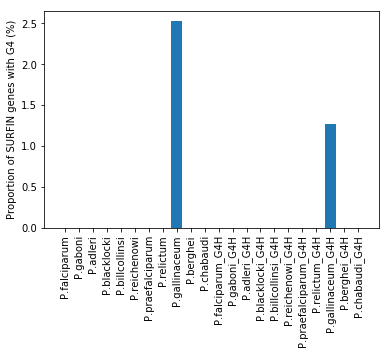

P.falciparum total 5 count 0
P.gaboni total 16 count 0
P.adleri total 24 count 0
P.blacklocki total 35 count 0
P.billcollinsi total 7 count 0
P.reichenowi total 6 count 0
P.praefalciparum total 7 count 0
P.relictum total 9 count 0
P.gallinaceum total 4 count 0
P.berghei total 4 count 1
P.chabaudi total 3 count 0
P.falciparum_G4H total 5 count 0
P.gaboni_G4H total 16 count 0
P.adleri_G4H total 24 count 0
P.blacklocki_G4H total 35 count 2
P.billcollinsi_G4H total 7 count 1
P.reichenowi_G4H total 6 count 1
P.praefalciparum_G4H total 7 count 0
P.relictum_G4H total 9 count 0
P.gallinaceum_G4H total 4 count 0
P.berghei_G4H total 4 count 0
P.chabaudi_G4H total 3 count 0


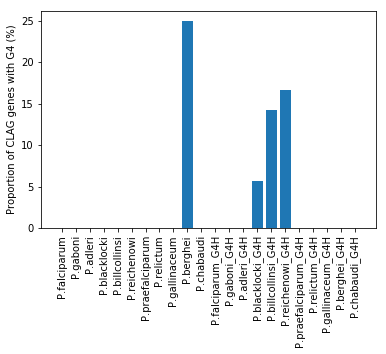

P.relictum total 4 count 0
P.gallinaceum total 49 count 0
P.relictum_G4H total 4 count 0
P.gallinaceum_G4H total 49 count 0


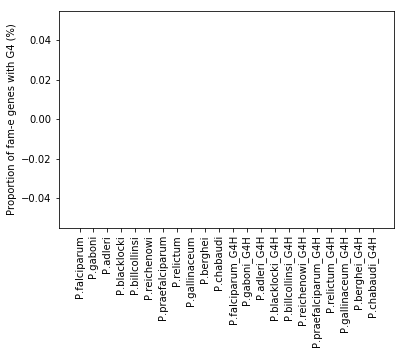

P.gaboni total 1 count 0
P.adleri total 1 count 0
P.blacklocki total 1 count 0
P.billcollinsi total 1 count 0
P.reichenowi total 1 count 0
P.praefalciparum total 1 count 0
P.relictum total 15 count 1
P.gallinaceum total 18 count 0
P.gaboni_G4H total 1 count 0
P.adleri_G4H total 1 count 0
P.blacklocki_G4H total 1 count 0
P.billcollinsi_G4H total 1 count 0
P.reichenowi_G4H total 1 count 0
P.praefalciparum_G4H total 1 count 0
P.relictum_G4H total 15 count 0
P.gallinaceum_G4H total 18 count 0


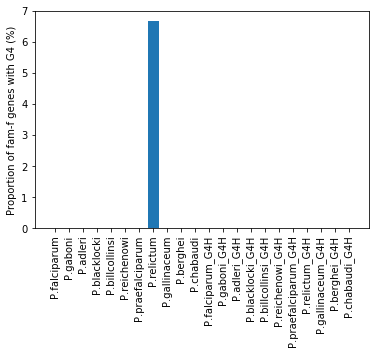

P.gallinaceum total 121 count 1
P.gallinaceum_G4H total 121 count 0


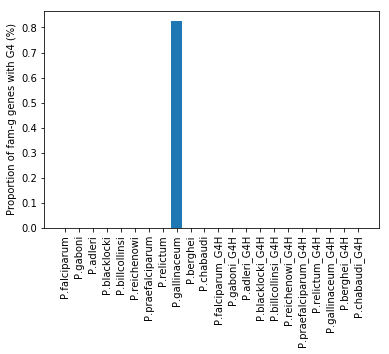

P.relictum total 49 count 0
P.gallinaceum total 2 count 0
P.relictum_G4H total 49 count 0
P.gallinaceum_G4H total 2 count 0


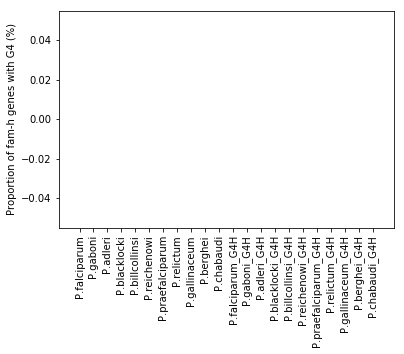

P.falciparum total 7 count 0
P.gaboni total 6 count 0
P.adleri total 8 count 0
P.blacklocki total 4 count 0
P.billcollinsi total 5 count 0
P.reichenowi total 7 count 0
P.praefalciparum total 5 count 0
P.relictum total 33 count 0
P.gallinaceum total 14 count 1
P.berghei total 16 count 0
P.chabaudi total 8 count 0
P.falciparum_G4H total 7 count 0
P.gaboni_G4H total 6 count 0
P.adleri_G4H total 8 count 0
P.blacklocki_G4H total 4 count 0
P.billcollinsi_G4H total 5 count 0
P.reichenowi_G4H total 7 count 0
P.praefalciparum_G4H total 5 count 0
P.relictum_G4H total 33 count 0
P.gallinaceum_G4H total 14 count 1
P.berghei_G4H total 16 count 0
P.chabaudi_G4H total 8 count 0


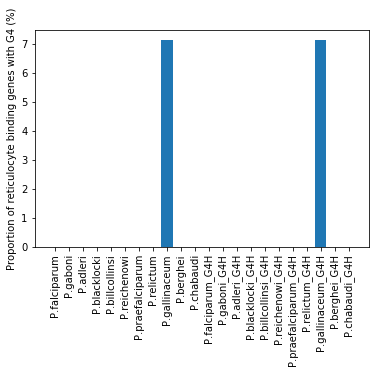

In [26]:
#Calculates the numbers and percentages of genes in each gene family with at least one PQS
#Gene family copy numbers from PlasmoDB
#Used in Fig 6 and Additional File 5, Fig S2

multi_gene_families = {"pir": {"P.falciparum": 227, "P.gaboni": 28, "P.adleri": 51, "P.blacklocki": 40, "P.billcollinsi": 362, "P.reichenowi": 520, "P.praefalciparum": 680, "P.relictum": 5, "P.gallinaceum": 22, "P.berghei": 217, "P.chabaudi": 208}
, "stevor": {"P.falciparum": 42, "P.gaboni": 11, "P.adleri": 29, "P.blacklocki": 11, "P.billcollinsi": 38, "P.reichenowi": 52, "P.praefalciparum": 28, "P.relictum": 0, "P.gallinaceum": 0, "P.berghei": 0, "P.chabaudi": 0}
, "rifin": {"P.falciparum": 185, "P.gaboni": 16, "P.adleri": 19, "P.blacklocki": 12, "P.billcollinsi": 253, "P.reichenowi": 424, "P.praefalciparum": 141, "P.relictum": 0, "P.gallinaceum": 0, "P.berghei": 0, "P.chabaudi": 0}
, "PHIST": {"P.falciparum": 54, "P.gaboni": 8, "P.adleri": 9, "P.blacklocki": 13, "P.billcollinsi": 5, "P.reichenowi": 5, "P.praefalciparum": 13, "P.relictum": 4 , "P.gallinaceum": 6, "P.berghei": 4, "P.chabaudi": 3}
, "SURFIN": {"P.falciparum": 11, "P.gaboni": 5, "P.adleri": 5, "P.blacklocki": 2, "P.billcollinsi": 5, "P.reichenowi": 5, "P.praefalciparum": 7, "P.relictum": 50 , "P.gallinaceum": 79, "P.berghei": 0, "P.chabaudi": 0}
, "CLAG": {"P.falciparum": 5, "P.gaboni": 16, "P.adleri": 24, "P.blacklocki": 35, "P.billcollinsi": 7, "P.reichenowi": 6, "P.praefalciparum": 7, "P.relictum": 9, "P.gallinaceum": 4, "P.berghei": 4, "P.chabaudi": 3}
, "fam-e": {"P.falciparum": 0, "P.gaboni": 0, "P.adleri": 0, "P.blacklocki": 0, "P.billcollinsi": 0, "P.reichenowi": 0, "P.praefalciparum": 0, "P.relictum": 4, "P.gallinaceum": 49, "P.berghei": 0, "P.chabaudi": 0}
, "fam-f": {"P.falciparum": 0, "P.gaboni": 1, "P.adleri": 1, "P.blacklocki": 1, "P.billcollinsi": 1, "P.reichenowi": 1, "P.praefalciparum": 1, "P.relictum": 15, "P.gallinaceum":18, "P.berghei": 0, "P.chabaudi": 0}
, "fam-g": {"P.falciparum": 0, "P.gaboni": 0, "P.adleri": 0, "P.blacklocki": 0, "P.billcollinsi": 0, "P.reichenowi": 0, "P.praefalciparum": 0, "P.relictum": 0, "P.gallinaceum": 121, "P.berghei": 0, "P.chabaudi": 0}
, "fam-h": {"P.falciparum": 0, "P.gaboni": 0, "P.adleri": 0, "P.blacklocki": 0, "P.billcollinsi": 0, "P.reichenowi": 0, "P.praefalciparum": 0, "P.relictum": 49, "P.gallinaceum": 2, "P.berghei": 0, "P.chabaudi": 0}
, "reticulocyte binding": {"P.falciparum": 7, "P.gaboni": 6, "P.adleri": 8, "P.blacklocki": 4, "P.billcollinsi": 5, "P.reichenowi": 7, "P.praefalciparum": 5, "P.relictum": 33, "P.gallinaceum": 14, "P.berghei": 16, "P.chabaudi": 8}}

multi_gene_species = {"P.falciparum": {"pir": 5, "stevor": 0, "rifin": 5, "PHIST": 1, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.gaboni": {"pir": 0, "stevor": 0, "rifin": 0, "PHIST": 0, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.adleri": {"pir": 0, "stevor": 0, "rifin": 0, "PHIST": 0, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.blacklocki": {"pir": 0, "stevor": 0, "rifin": 0, "PHIST": 0, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.billcollinsi": {"pir": 2, "stevor": 0, "rifin": 2, "PHIST": 0, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.reichenowi": {"pir": 0, "stevor": 0, "rifin": 0, "PHIST": 0, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.praefalciparum": {"pir": 3, "stevor": 0, "rifin": 3, "PHIST": 0, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.relictum": {"pir": 0, "stevor": 0, "rifin": 0, "PHIST": 0, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 1, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.gallinaceum": {"pir": 0, "stevor": 0, "rifin": 0, "PHIST": 0, "SURFIN": 2, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 1, "fam-h": 0, "reticulocyte binding": 1},
                     "P.berghei": {"pir": 35, "stevor": 0, "rifin": 0, "PHIST": 0, "SURFIN": 0, "CLAG": 1, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.chabaudi": {"pir": 11, "stevor": 0, "rifin": 0, "PHIST": 0, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.falciparum_G4H": {"pir": 1, "stevor": 0, "rifin": 1, "PHIST": 1, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.gaboni_G4H": {"pir": 0, "stevor": 0, "rifin": 0, "PHIST": 1, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.adleri_G4H": {"pir": 0, "stevor": 0, "rifin": 0, "PHIST": 2, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.blacklocki_G4H": {"pir": 1, "stevor": 0, "rifin": 1, "PHIST": 0, "SURFIN": 0, "CLAG": 2, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.billcollinsi_G4H": {"pir": 15, "stevor": 0, "rifin": 15, "PHIST": 1, "SURFIN": 0, "CLAG": 1, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.reichenowi_G4H": {"pir": 12, "stevor": 0, "rifin": 12, "PHIST": 0, "SURFIN": 0, "CLAG": 1, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.praefalciparum_G4H": {"pir": 0, "stevor": 0, "rifin": 0, "PHIST": 1, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.relictum_G4H": {"pir": 0, "stevor": 0, "rifin": 0, "PHIST": 0, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.gallinaceum_G4H": {"pir": 0, "stevor": 0, "rifin": 0, "PHIST": 0, "SURFIN": 1, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 1},
                     "P.berghei_G4H": {"pir": 1, "stevor": 0, "rifin": 0, "PHIST": 0, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0},
                     "P.chabaudi_G4H": {"pir": 4, "stevor": 0, "rifin": 0, "PHIST": 0, "SURFIN": 0, "CLAG": 0, "fam-e": 0, "fam-f": 0, "fam-g": 0, "fam-h": 0, "reticulocyte binding": 0}}

proportions_data = {}
for gene_family in multi_gene_families:
    proportions_dict = {}
    proportions_list = []
    for species in multi_gene_species:
        if "_G4H" in species:
            if multi_gene_families[gene_family][species.split("_")[0]] == 0:
                proportions_dict.update({species: 0})
                proportions_list.append(0)
                continue
            proportion = multi_gene_species[species][gene_family] / multi_gene_families[gene_family][species.split("_")[0]]
            print(species, "total", multi_gene_families[gene_family][species.split("_")[0]], "count", multi_gene_species[species][gene_family]  )
            proportions_list.append(proportion*100)
            proportions_dict.update({species:(proportion * 100)})
        else:
            if multi_gene_families[gene_family][species] == 0:
                proportions_dict.update({species: 0})
                proportions_list.append(0)
                continue
            proportion = multi_gene_species[species][gene_family] / multi_gene_families[gene_family][species]
            proportions_dict.update({species: (proportion*100)})
            proportions_list.append(proportion * 100)
            print(species, "total", multi_gene_families[gene_family][species], "count", multi_gene_species[species][gene_family])
    proportions_data.update({gene_family: proportions_dict})
    plt.bar(range(len(proportions_list)), proportions_list, align="center")
    plt.xticks(range(len(proportions_list)), list(multi_gene_species.keys()), rotation="vertical")
    plt.ylabel('Proportion of ' + gene_family + ' genes with G4 (%)')
    plt.show()

data_to_save = pd.DataFrame(multi_gene_species)
data_to_save.to_csv("/Users/HunterGage/Desktop/Summary Data and Figures/G4s associated with other multigene families.csv")
data_to_save_proportions = pd.DataFrame(proportions_data)
data_to_save_proportions.to_csv("/Users/HunterGage/Desktop/Summary Data and Figures/G4s associated with other multigene families_proportions.csv")

In [27]:
#Lists all of the gene annotations associated with PQSs for all of the species
#Only considers PQS within 2000 bp of an annotated gene
#Also gives a list of the total number of PQS associated with each gene for each species and overall
#Excludes telomeres
#EXCLUDES repeats (multiple PQS with the same gene ID)

annotations_summary = {}
overall_genes = {}

for species in filtered_data_has_gene_no_repeats:
    gene_list_unique = {}
    annotations = list(filtered_data_has_gene_no_repeats.get(species)["Gene Annotation"])
    for annotation in annotations:
        if annotation not in gene_list_unique:
            gene_list_unique.update({annotation: 1})
            overall_genes.update({annotation: 1})
        elif annotation in annotations:
            gene_list_unique[annotation] += 1
            overall_genes[annotation] += 1
    annotations_summary.update({species: gene_list_unique})

annotations_summary_DataFrame = pd.DataFrame(annotations_summary).fillna(0)
pd.set_option('display.max_rows', 400)
display(annotations_summary_DataFrame)


#finding the total number of unique gene annotations that were found in the entire dataset
display(pd.DataFrame(overall_genes, index=[0]).transpose())
count = 0
for key in overall_genes:
    count += 1
print(count)

,P.falciparum,P.gaboni,P.adleri,P.blacklocki,P.billcollinsi,P.reichenowi,P.praefalciparum,P.relictum,P.gallinaceum,P.berghei,...,P.gaboni_G4H,P.adleri_G4H,P.blacklocki_G4H,P.billcollinsi_G4H,P.reichenowi_G4H,P.praefalciparum_G4H,P.relictum_G4H,P.gallinaceum_G4H,P.berghei_G4H,P.chabaudi_G4H
"26S proteasome non-ATPase regulatory subunit 9, putative",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40S ribosomal protein S11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"40S ribosomal protein S18, putative",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40S ribosomal protein S19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
40S ribosomal protein S2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"40S ribosomal protein S21, putative",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"40S ribosomal protein S24, putative",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"40S ribosomal protein S5, putative",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"50S ribosomal protein L18, apicoplast, putative",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6-cysteine protein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


,0
"erythrocyte membrane protein 1, PfEMP1",3
phosphatidylinositol-4-phosphate 5-kinase,1
rifin,1
"TMEM121 domain-containing protein, putative",1
"PCI domain-containing protein, putative",1
circumsporozoite (CS) protein,1
oocyst capsule protein Cap380,1
kinesin-5,1
"S-adenosyl-L-methionine-dependent tRNA 4-demethylwyosine synthase, putative",1
ubiquitin carboxyl-terminal hydrolase 14,1


364


In [28]:
#Comparing QGRS Mapper to G4 Hunter
#For each species, finds gene IDs that were found by both algorithms
#Excludes repeats
#Used in Fig 8

summary_data = {}
for species in filtered_data_has_gene_no_repeats:
    if "G4H" not in species:
        QGRS_genes = list(filtered_data_has_gene_no_repeats.get(species)["Nearest gene ID"])
        G4_genes = list(filtered_data_has_gene_no_repeats.get(species + "_G4H")["Nearest gene ID"])
        common_genes = filtered_data_has_gene_no_repeats[species][filtered_data_has_gene_no_repeats[species]["Nearest gene ID"].isin(G4_genes)]
        #display(common_genes)
        summary_dict = {"common genes": len(common_genes["Nearest gene ID"]), "QGRS genes": len(QGRS_genes), "G4 genes": len(G4_genes)}
        summary_data.update({species: summary_dict})
        #print(species, summary_dict)

#print("\n")

#for dat in summary_data:
    #print(dat, summary_data[dat])
    
data_to_save = pd.DataFrame(summary_data)
data_to_save.to_csv("/Users/HunterGage/Desktop/Summary Data and Figures/Comparison of QGRS Mapper an G4 Hunter.csv")

In [29]:
#Comparing QGRS Mapper to G4 Hunter
#For each species, finds gene IDs that were found by QGRS Mapper but not by G4 Hunter
#Excludes telomeres

summary_data = {}
for species in filtered_data_has_gene_no_repeats:
    if "G4H" not in species:
        QGRS_genes = list(filtered_data_has_gene_no_repeats.get(species)["Nearest gene ID"])
        G4_genes = list(filtered_data_has_gene_no_repeats.get(species + "_G4H")["Nearest gene ID"])
        QGRS_only_genes = filtered_data_has_gene_no_repeats[species][~filtered_data_has_gene_no_repeats[species]["Nearest gene ID"].isin(G4_genes)]
        #print(species)
        #display(QGRS_only_genes)

In [30]:
#Comparing QGRS Mapper to G4 Hunter
#For each species, finds gene IDs that were found by G4 Hunter but not by QGRS Mapper
#Excludes repeats

summary_data = {}
for species in filtered_data_has_gene_no_repeats:
    if "G4H" in species:
        QGRS_genes = list(filtered_data_has_gene_no_repeats.get(species.split("_")[0])["Nearest gene ID"])
        G4_Hunter_genes = list(filtered_data_has_gene_no_repeats.get(species)["Nearest gene ID"])
        G4_Hunter_only_genes = filtered_data_has_gene_no_repeats[species][~filtered_data_has_gene_no_repeats[species]["Nearest gene ID"].isin(QGRS_genes)]
        #print(species)
        #display(G4_Hunter_only_genes)

                      P.falciparum   P.gaboni   P.adleri  P.blacklocki  \
coding                   63.000000  25.000000  29.000000     49.000000   
coding / noncoding        1.369565   4.166667   4.142857      3.266667   
coding / total (%)       57.798165  80.645161  80.555556     76.562500   
downstream               16.000000   2.000000   3.000000      7.000000   
noncoding                46.000000   6.000000   7.000000     15.000000   
upstream                 30.000000   4.000000   4.000000      8.000000   
upstream / coding         0.476190   0.160000   0.137931      0.163265   
upstream / total (%)     27.522936  12.903226  11.111111     12.500000   

                      P.billcollinsi  P.reichenowi  P.praefalciparum  \
coding                     61.000000     67.000000         81.000000   
coding / noncoding          4.357143      5.583333          3.115385   
coding / total (%)         81.333333     84.810127         75.700935   
downstream                  5.000000      3.0

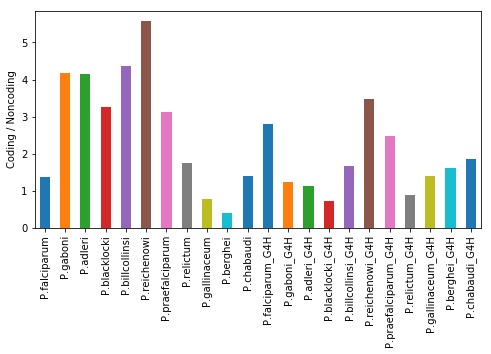

In [31]:
#Compares coding v. non-coding apportionment of PQSs across species
#Excludes telomeres
#Includes repeats
#Used in Fig 3

summary_data = {}
for species in data_no_telomeres:
    summary_dict = {}
    upstream = 0
    downstream = 0
    coding = 0
    none = 0
    for ups_down_coding in list(data_no_telomeres.get(species)["Coding, upstream, or downstream?"]):
        if ups_down_coding == "":
            none += 1
        if ups_down_coding.lower() == "ups":
            upstream += 1
        elif ups_down_coding.lower() == "down":
            downstream += 1
        elif ups_down_coding.lower() == "in":
            coding += 1
    summary_dict.update({"upstream": upstream, 
                         "downstream": downstream, 
                         "noncoding": (upstream + downstream + none), 
                         "coding": coding, 
                         "coding / noncoding": coding / (upstream + downstream + none),
                         "upstream / coding": (upstream / coding),
                         "upstream / total (%)": (upstream / (upstream + downstream + none + coding)) * 100,
                         "coding / total (%)": (coding / (upstream + downstream + none + coding)) * 100})
    summary_data.update({species: summary_dict})
print(DataFrame(summary_data))

data_to_save = pd.DataFrame(summary_data)
data_to_save.to_csv("/Users/HunterGage/Desktop/Summary Data and Figures/Apportionment of G4s in ups vz coding regions.csv")

plt.figure(figsize=(8,4))
ax = pd.DataFrame(summary_data).loc["coding / noncoding"].plot.bar()
ax.set_xticklabels(summary_data.keys())
ax.set_ylabel('Coding / Noncoding')
ax            

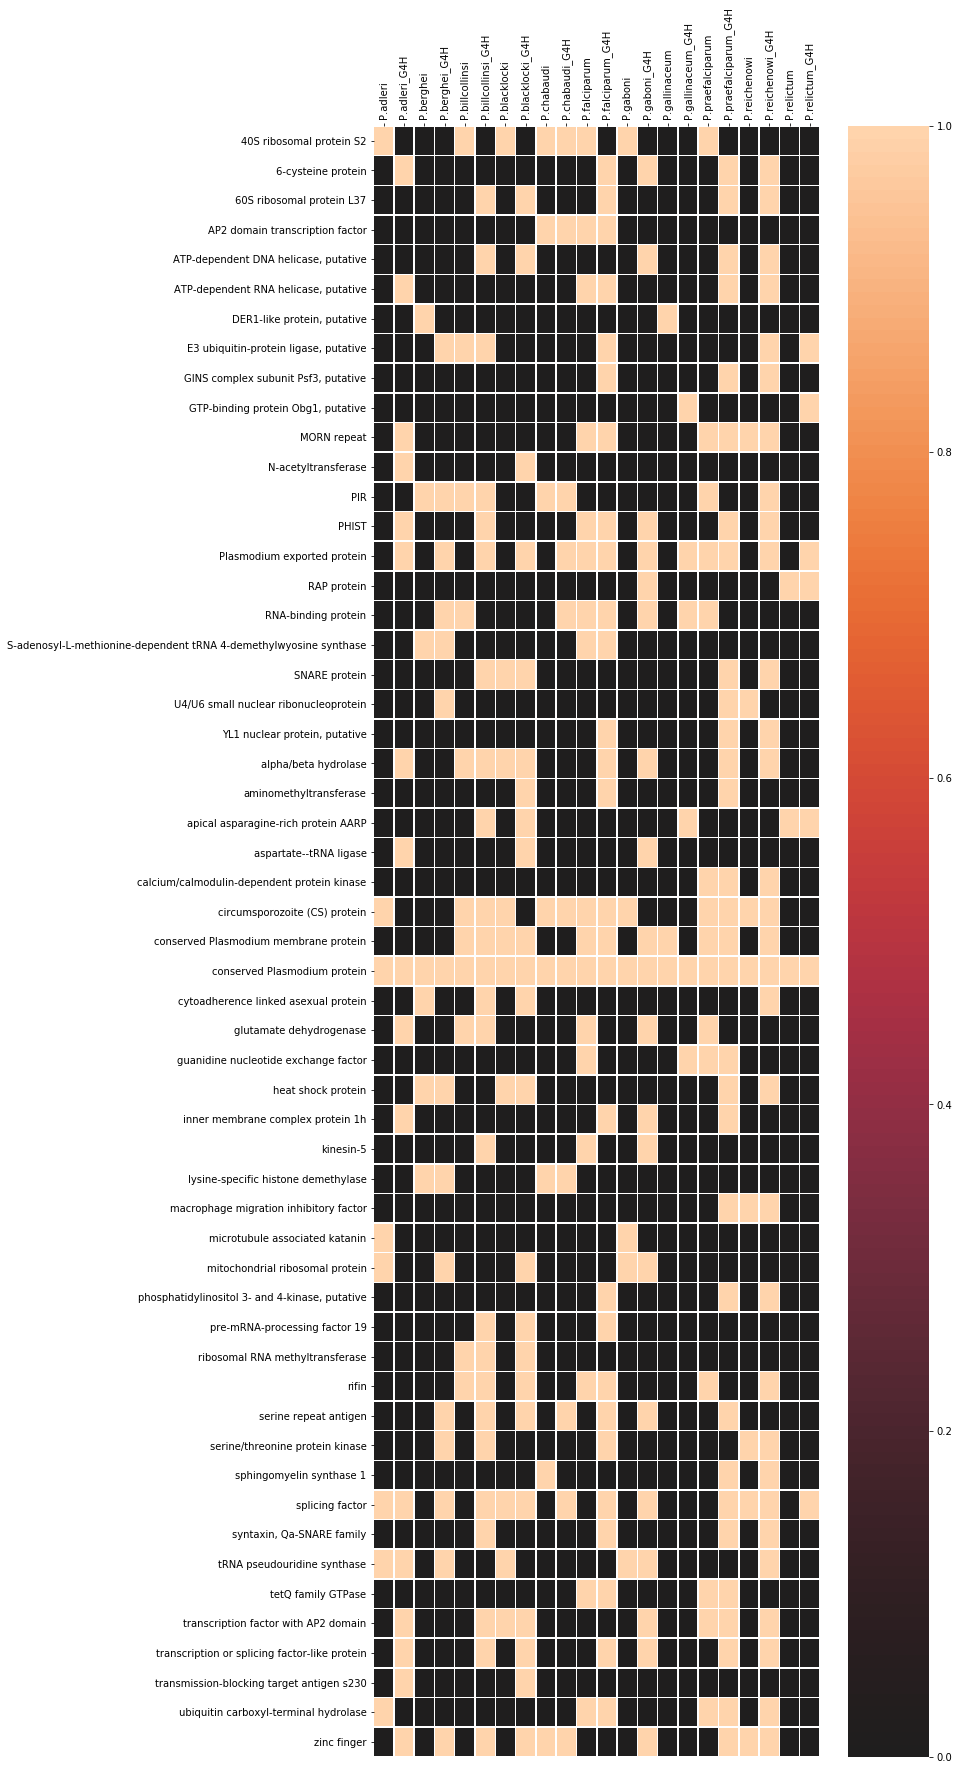

In [32]:
#Lists conserved PQss in non-var genes

conserved_G4s_non_var = ["40S ribosomal protein S2", "6-cysteine protein", "60S ribosomal protein L37", 
                         "AP2 domain transcription factor", "ATP-dependent DNA helicase, putative", 
                         "ATP-dependent RNA helicase, putative", "DER1-like protein, putative", 
                         "E3 ubiquitin-protein ligase, putative", "GINS complex subunit Psf3, putative", 
                         "GTP-binding protein Obg1, putative", "MORN repeat", "N-acetyltransferase", "PIR", "PHIST", 
                         "Plasmodium exported protein", "RAP protein", "RNA-binding protein", "S-adenosyl-L-methionine-dependent tRNA 4-demethylwyosine synthase",
                         "SNARE protein", "U4/U6 small nuclear ribonucleoprotein", "YL1 nuclear protein, putative",
                         "alpha/beta", "aminomethyltransferase", "apical asparagine-rich protein AARP", "aspartate--tRNA ligase",
                         "calcium/calmodulin-dependent protein kinase", "circumsporozoite (CS) protein", "conserved Plasmodium membrane protein",
                         "conserved Plasmodium protein", "cytoadherence linked asexual protein", "glutamate dehydrogenase",
                         "guanidine nucleotide exchange factor", "heat shock protein", "inner membrane complex protein 1h",
                         "kinesin-5", "lysine-specific histone demethylase", "macrophage migration inhibitory factor", "microtubule associated katanin",
                         "mitochondrial ribosomal protein", "phosphatidylinositol 3- and 4-kinase, putative", "pre-mRNA-processing factor 19", "ribosomal RNA methyltransferase",
                         "rifin", "serine repeat antigen", "serine/threonine protein kinase", "sphingomyelin synthase 1", "splicing factor",
                         "syntaxin, Qa-SNARE family", "tRNA pseudouridine synthase", "tetQ family GTPase", "transcription factor with AP2 domain",
                         "transcription or splicing factor-like protein", "transmission-blocking target antigen s230",
                         "ubiquitin carboxyl-terminal hydrolase", "zinc finger"]
conserved_G4s_non_var_data = {}
for gene in conserved_G4s_non_var:
    species_dict = {"P.falciparum": 0, "P.adleri": 0, "P.gaboni": 0, "P.blacklocki": 0, "P.billcollinsi": 0, "P.reichenowi": 0, "P.praefalciparum": 0, "P.relictum": 0, "P.gallinaceum": 0, "P.berghei": 0, "P.chabaudi": 0,
                   "P.falciparum_G4H": 0, "P.adleri_G4H": 0, "P.gaboni_G4H": 0, "P.blacklocki_G4H": 0, "P.billcollinsi_G4H": 0, "P.reichenowi_G4H": 0, "P.praefalciparum_G4H": 0, "P.relictum_G4H": 0, "P.gallinaceum_G4H": 0, "P.berghei_G4H": 0, "P.chabaudi_G4H": 0}
    conserved_G4s_non_var_data.update({gene: species_dict})
    list_of_species_with_gene = []
    for species in annotations_summary:
        for species_gene in annotations_summary[species]:
            if species_gene in gene or gene in species_gene:
                if species not in list_of_species_with_gene:
                    list_of_species_with_gene.append(species)
    for species in list_of_species_with_gene:
        conserved_G4s_non_var_data[gene][species] = 1
    if gene == "alpha/beta":
        conserved_G4s_non_var_data["alpha/beta hydrolase"] = conserved_G4s_non_var_data.pop("alpha/beta")

fig, ax = plt.subplots(figsize=(10,30))
sns.heatmap(pd.DataFrame(conserved_G4s_non_var_data).T, linewidths=0.5, vmax = 1, center = 0, annot=False, xticklabels=True, yticklabels=True, ax=ax)
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.savefig("/Users/HunterGage/Desktop/Summary Data and Figures/conserved_G4s_non_var.png", bbox_inches="tight")

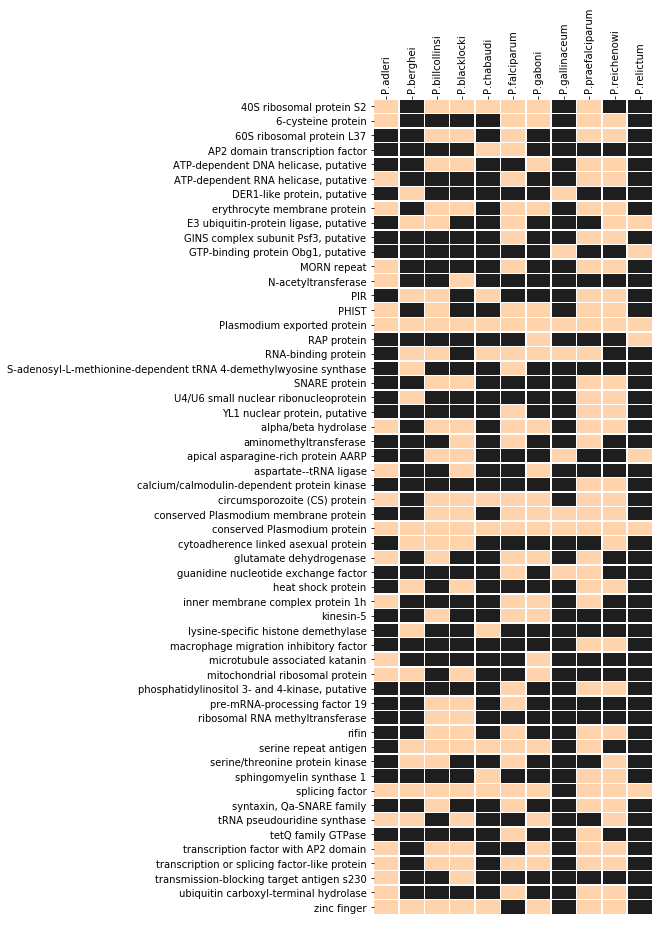

In [33]:
#Lists conserved PQS in non-var genes and generates heatmap
#Combines the data from the two algorithms for each species to condense the heatmap
#Used in Additional File 7, Figure S3

conserved_G4s_non_var = ["40S ribosomal protein S2", "6-cysteine protein", "60S ribosomal protein L37", 
                         "AP2 domain transcription factor", "ATP-dependent DNA helicase, putative", 
                         "ATP-dependent RNA helicase, putative", "DER1-like protein, putative", "erythrocyte membrane protein",
                         "E3 ubiquitin-protein ligase, putative", "GINS complex subunit Psf3, putative", 
                         "GTP-binding protein Obg1, putative", "MORN repeat", "N-acetyltransferase", "PIR", "PHIST", 
                         "Plasmodium exported protein", "RAP protein", "RNA-binding protein", "S-adenosyl-L-methionine-dependent tRNA 4-demethylwyosine synthase",
                         "SNARE protein", "U4/U6 small nuclear ribonucleoprotein", "YL1 nuclear protein, putative",
                         "alpha/beta", "aminomethyltransferase", "apical asparagine-rich protein AARP", "aspartate--tRNA ligase",
                         "calcium/calmodulin-dependent protein kinase", "circumsporozoite (CS) protein", "conserved Plasmodium membrane protein",
                         "conserved Plasmodium protein", "cytoadherence linked asexual protein", "glutamate dehydrogenase",
                         "guanidine nucleotide exchange factor", "heat shock protein", "inner membrane complex protein 1h",
                         "kinesin-5", "lysine-specific histone demethylase", "macrophage migration inhibitory factor", "microtubule associated katanin",
                         "mitochondrial ribosomal protein", "phosphatidylinositol 3- and 4-kinase, putative", "pre-mRNA-processing factor 19", "ribosomal RNA methyltransferase",
                         "rifin", "serine repeat antigen", "serine/threonine protein kinase", "sphingomyelin synthase 1", "splicing factor",
                         "syntaxin, Qa-SNARE family", "tRNA pseudouridine synthase", "tetQ family GTPase", "transcription factor with AP2 domain",
                         "transcription or splicing factor-like protein", "transmission-blocking target antigen s230",
                         "ubiquitin carboxyl-terminal hydrolase", "zinc finger"]
conserved_G4s_non_var_data = {}
for gene in conserved_G4s_non_var:
    species_dict = {"P.falciparum": 0, "P.adleri": 0, "P.gaboni": 0, "P.blacklocki": 0, "P.billcollinsi": 0, "P.reichenowi": 0, "P.praefalciparum": 0, "P.relictum": 0, "P.gallinaceum": 0, "P.berghei": 0, "P.chabaudi": 0}
    conserved_G4s_non_var_data.update({gene: species_dict})
    list_of_species_with_gene = []
    for species in annotations_summary:
        for species_gene in annotations_summary[species]:
            if species_gene in gene or gene in species_gene:
                if species not in list_of_species_with_gene:
                    if "_G4H" in species:
                        list_of_species_with_gene.append(species.split("_")[0])
                    else:
                        list_of_species_with_gene.append(species)
    for species in list_of_species_with_gene:
        conserved_G4s_non_var_data[gene][species] = 1
    if gene == "alpha/beta":
        conserved_G4s_non_var_data["alpha/beta hydrolase"] = conserved_G4s_non_var_data.pop("alpha/beta")

list_GO_terms = []
for conserved_annotation in conserved_G4s_non_var_data:
    for species in filtered_data_has_gene_no_repeats:
        annotation_hits = []
        for species_annotation in list(filtered_data_has_gene_no_repeats[species]["Gene Annotation"]):
            if (species_annotation in conserved_annotation) or (conserved_annotation in species_annotation):
                annotation_hits.append(species_annotation)
                filtered_for_IDs = filtered_data_has_gene_no_repeats[species][filtered_data_has_gene_no_repeats[species]["Gene Annotation"].str.contains('|'.join(annotation_hits))]
                if len(filtered_for_IDs["Nearest gene ID"]) > 0:
                    if list(filtered_for_IDs["Nearest gene ID"])[0] not in list_GO_terms:
                        list_GO_terms.append(list(filtered_for_IDs["Nearest gene ID"])[0])

species_lists = {}
species = {"PF3D7", "PADL01", "PBLACG01", "PGABG01", "PBILCG01", "PPRFG01", "PRG01", "PRELSG", "PGAL8A", "PBANKA", "PCHAS"}
for sp in species:
    species_genes = []
    for gene in list_GO_terms:
        if sp in gene:
            species_genes.append(gene)
    species_lists.update({sp: species_genes})
            

fig, ax = plt.subplots(figsize=(5,15))
sns.heatmap(pd.DataFrame(conserved_G4s_non_var_data).T, linewidths=0.5, vmax = 1, center = 0, annot=False, xticklabels=True, yticklabels=True, cbar=False, ax=ax)
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.savefig("/Users/HunterGage/Desktop/Summary Data and Figures/conserved_G4s_non_var_consolidated.png", bbox_inches="tight", dpi=300)

In [34]:
#Analyzing G4-seq v. algorithms data
#Get summary statistics of concordance between G4-Seq and QGRS Mapper, and between G4-Seq and G4 Hunter
#Used in Additional File 9

QGRSMapper_G4seq_data = pd.read_csv("/Users/HunterGage/Desktop/Whole Genome Sequences/G4seq_QGRSMapper_analysis.csv")
G4Hunter_G4seq_data = pd.read_csv("/Users/HunterGage/Desktop/Whole Genome Sequences/G4seq_G4Hunter_analysis.csv")

#total G4s found in the G4-seq data
total_G4seq = 158 + 168

#number of G4s from the G4-seq data that were also predicted by QGRS Mapper
found_by_QGRSMapper = 0
for seq in list(QGRSMapper_G4seq_data["Found in G4 seq?"]):
    if not "not found" in seq:
        found_by_QGRSMapper += 1

#number of G4s from the G4-seq data that were also predicted by G4 Hunter
found_by_G4Hunter = 0
for seq in list(G4Hunter_G4seq_data["Found in G4 seq?"]):
    if not "not found" in seq:
        found_by_G4Hunter += 1

#filter to get only the PQSs in telomeres
QGRSMapper_G4seq_data["Telomere?"] = QGRSMapper_G4seq_data["Telomere?"].replace(np.nan, "No")
telomere_QGRSMapper_G4seq_data = QGRSMapper_G4seq_data[QGRSMapper_G4seq_data["Telomere?"].str.contains("Yes")]
G4Hunter_G4seq_data["Telomere?"] = G4Hunter_G4seq_data["Telomere?"].replace(np.nan, "No")
telomere_G4Hunter_G4seq_data = G4Hunter_G4seq_data[G4Hunter_G4seq_data["Telomere?"].str.contains("Yes")]

#count the number of PQSs in telomeres that were found by G4-seq and predicted by algorithms
telomere_found_by_QGRSMapper = 0
for seq in list(telomere_QGRSMapper_G4seq_data["Found in G4 seq?"]):
    if not "not found" in seq:
        telomere_found_by_QGRSMapper += 1

telomere_found_by_G4Hunter = 0
for seq in list(telomere_G4Hunter_G4seq_data["Found in G4 seq?"]):
    if not "not found" in seq:
        telomere_found_by_G4Hunter += 1

print("total number of G4s in G4 seq data:", total_G4seq)
print("number found by QGRS Mapper:", found_by_QGRSMapper)
print("number found by G4 Hunter:", found_by_G4Hunter)
print("apportionment of QGRS Mapper: telomeric: " + str(telomere_found_by_QGRSMapper) + " non-telomeric: " + str(found_by_QGRSMapper - telomere_found_by_QGRSMapper))
print("apportionment of G4Hunter Mapper: telomeric: " + str(telomere_found_by_G4Hunter) + " non-telomeric: " + str(found_by_G4Hunter - telomere_found_by_G4Hunter))

total number of G4s in G4 seq data: 326
number found by QGRS Mapper: 268
number found by G4 Hunter: 18
apportionment of QGRS Mapper: telomeric: 244 non-telomeric: 24
apportionment of G4Hunter Mapper: telomeric: 0 non-telomeric: 18


In [35]:
#get list of PQS-associated gene IDs for each species to use in GO terms analysis

summary_data = {}
for species in filtered_data_has_gene:
    if "_G4H" not in species:
        genes = []
        for gene in list(filtered_data_has_gene[species]["Nearest gene ID"]):
            if gene not in genes:
                genes.append(gene)
        for gene in list(filtered_data_has_gene[species + "_G4H"]["Nearest gene ID"]):
            if gene not in genes:
                genes.append(gene)
        summary_data.update({species: genes})


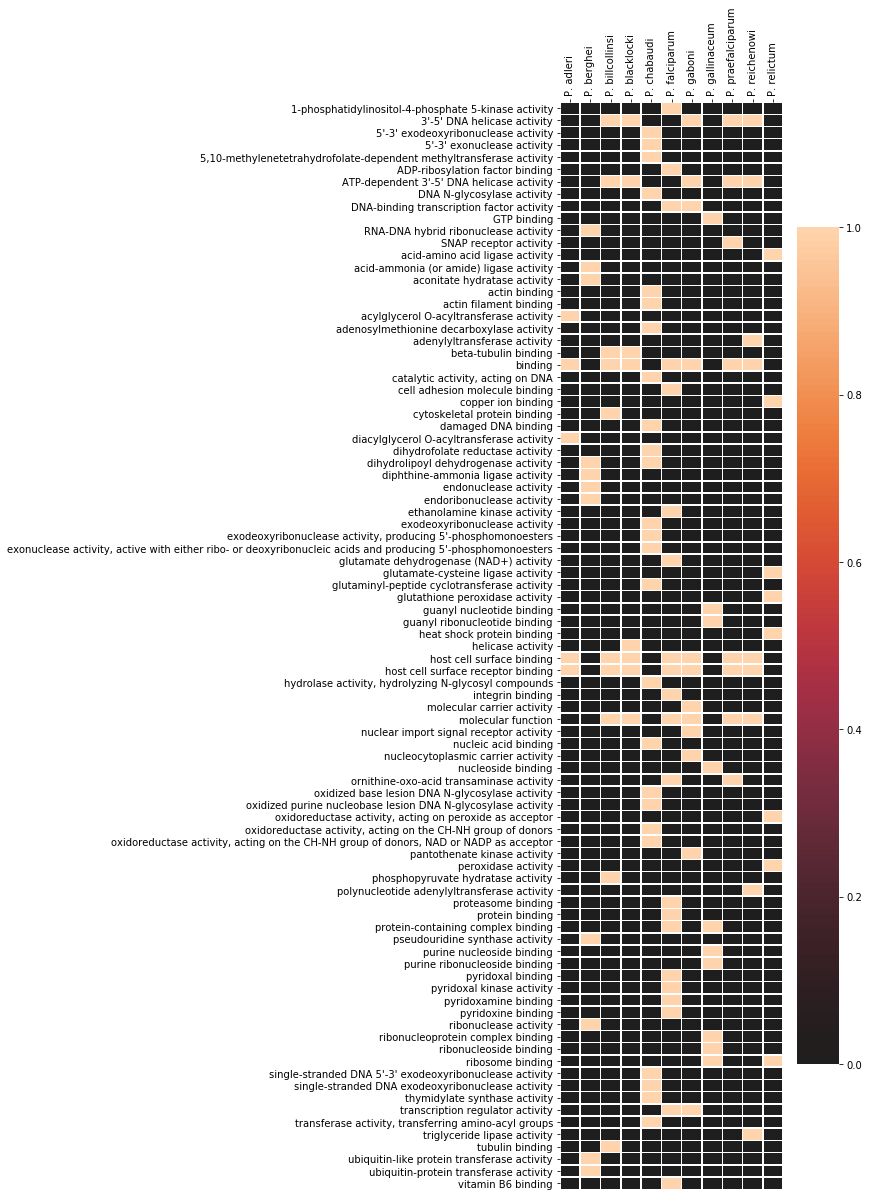

In [36]:
#heat map of GO terms for molecular function (unordered and unbinned)

GO_terms_data = pd.read_csv("/Users/HunterGage/Desktop/Summary Data and Figures/GO_terms_species.csv")

GO_terms = []
index = 0
for term in list(GO_terms_data["GO Term"]):
    if list(GO_terms_data["Category"])[index] == "Molecular Function":
        if term not in GO_terms:
            GO_terms.append(term)
    index += 1

    
GO_terms_heatdata = {}
for term in sorted(GO_terms):
    species_dict = {"P. falciparum": 0, "P. adleri": 0, "P. gaboni": 0, "P. blacklocki": 0, "P. billcollinsi": 0, "P. reichenowi": 0, "P. praefalciparum": 0, "P. relictum": 0, "P. gallinaceum": 0, "P. berghei": 0, "P. chabaudi": 0}
    GO_terms_heatdata.update({term: species_dict})
    list_of_species_with_GOterm = []
    for species in species_dict:
        index = 0
        for GOterm in list(GO_terms_data["GO Term"]):
            if list(GO_terms_data["Species"])[index] == species:
                if GOterm == term:
                    if species not in list_of_species_with_GOterm:
                        list_of_species_with_GOterm.append(species)
            index += 1
    for species in list_of_species_with_GOterm:
        GO_terms_heatdata[term][species] = 1

fig, ax = plt.subplots(figsize=(5,20))
sns.heatmap(pd.DataFrame(GO_terms_heatdata).T, linewidths=0.5, vmax = 1, center = 0, annot=False, xticklabels=True, yticklabels=True, ax=ax)
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.savefig("/Users/HunterGage/Desktop/Summary Data and Figures/GO_terms_molecularfunction.png", bbox_inches="tight", dpi=300)

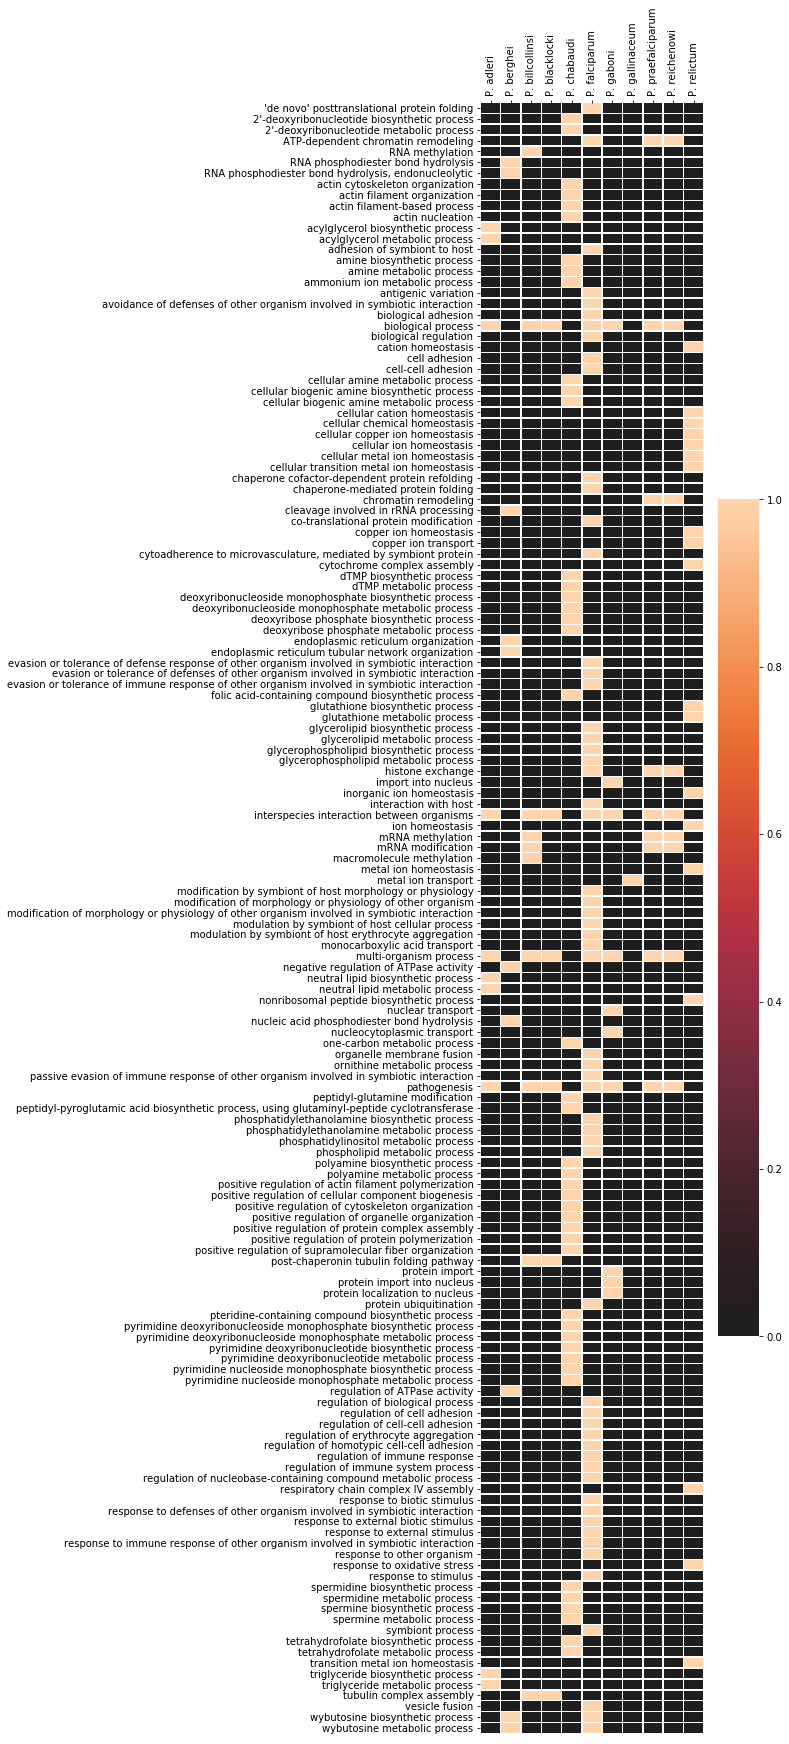

In [37]:
#heatmap of GO terms for biological process (unordered and unbinned)

GO_terms_data = pd.read_csv("/Users/HunterGage/Desktop/Summary Data and Figures/GO_terms_species.csv")

GO_terms = []
index = 0
for term in list(GO_terms_data["GO Term"]):
    if list(GO_terms_data["Category"])[index] == "Biological Process":
        if term not in GO_terms:
            GO_terms.append(term)
    index += 1

    
GO_terms_heatdata = {}
for term in sorted(GO_terms):
    species_dict = {"P. falciparum": 0, "P. adleri": 0, "P. gaboni": 0, "P. blacklocki": 0, "P. billcollinsi": 0, "P. reichenowi": 0, "P. praefalciparum": 0, "P. relictum": 0, "P. gallinaceum": 0, "P. berghei": 0, "P. chabaudi": 0}
    GO_terms_heatdata.update({term: species_dict})
    list_of_species_with_GOterm = []
    for species in species_dict:
        index = 0
        for GOterm in list(GO_terms_data["GO Term"]):
            if list(GO_terms_data["Species"])[index] == species:
                if GOterm == term:
                    if species not in list_of_species_with_GOterm:
                        list_of_species_with_GOterm.append(species)
            index += 1
    for species in list_of_species_with_GOterm:
        GO_terms_heatdata[term][species] = 1
fig, ax = plt.subplots(figsize=(5,30))
sns.heatmap(pd.DataFrame(GO_terms_heatdata).T, linewidths=0.5, vmax = 1, center = 0, annot=False, xticklabels=True, yticklabels=True, ax=ax)
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.savefig("/Users/HunterGage/Desktop/Summary Data and Figures/GO_terms_biologicalprocess.png", bbox_inches="tight", dpi=300)

In [38]:
#Search for "common PQSs" between QGRS Mapper and G4 Hunter
#Common PQSs are defined as sequences that are substrings of each other, and that have similar locations
#Used in Additional File 9

for species in filtered_data_has_gene:
    if not "G4H" in species:
        #print(species)
        for indexQGRS, rowQGRS in filtered_data_has_gene[species].iterrows():
            for indexG4H, rowG4H in filtered_data_has_gene[species + "_G4H"].iterrows():
                if int(rowG4H["SCORE"]) < 0:
                    G4seq = str(Seq(rowG4H["Sequence"]).reverse_complement())
                else:
                    G4seq = rowG4H["Sequence"]
                if (rowQGRS["PQS"] in G4seq or G4seq in rowQGRS["PQS"]) and str(rowG4H["Chromosome"]) in str(rowQGRS["Chromosome"]):
                    d = pd.DataFrame(rowQGRS)
                    f = pd.DataFrame(rowG4H)
                    #display(pd.concat([d, f], axis=1, sort=False))

In [39]:
#Calculate total number of gene-associated PQSs predicted by QGRS Mapper and G4 Hunter, and the total number of gene-associated PQSs per species
#Used in Additional File 9

count = 0
for species in filtered_data_has_gene:
    if not "G4H" in species:
        for indexQGRS, rowQGRS in filtered_data_has_gene[species].iterrows():
            count += 1
print("total number of gene-associated PQSs in QGRS Mapper: ", count)

count = 0
for species in filtered_data_has_gene:
    if "G4H" in species:
        for indexG4H, rowG4H in filtered_data_has_gene[species].iterrows():
            count += 1
print("total number of gene-associated PQSs in G4 Hunter: ", count)

summary_data = {}
for species in filtered_data_has_gene:
    count = 0
    for index, row in filtered_data_has_gene[species].iterrows():
        count += 1
    summary_data.update({species: count})
for data in summary_data:
    print (data, summary_data[data])
    

total number of gene-associated PQSs in QGRS Mapper:  634
total number of gene-associated PQSs in G4 Hunter:  1455
P.falciparum 104
P.gaboni 27
P.adleri 36
P.blacklocki 64
P.billcollinsi 71
P.reichenowi 75
P.praefalciparum 107
P.relictum 10
P.gallinaceum 24
P.berghei 64
P.chabaudi 52
P.falciparum_G4H 207
P.gaboni_G4H 85
P.adleri_G4H 117
P.blacklocki_G4H 90
P.billcollinsi_G4H 167
P.reichenowi_G4H 297
P.praefalciparum_G4H 256
P.relictum_G4H 41
P.gallinaceum_G4H 22
P.berghei_G4H 99
P.chabaudi_G4H 74


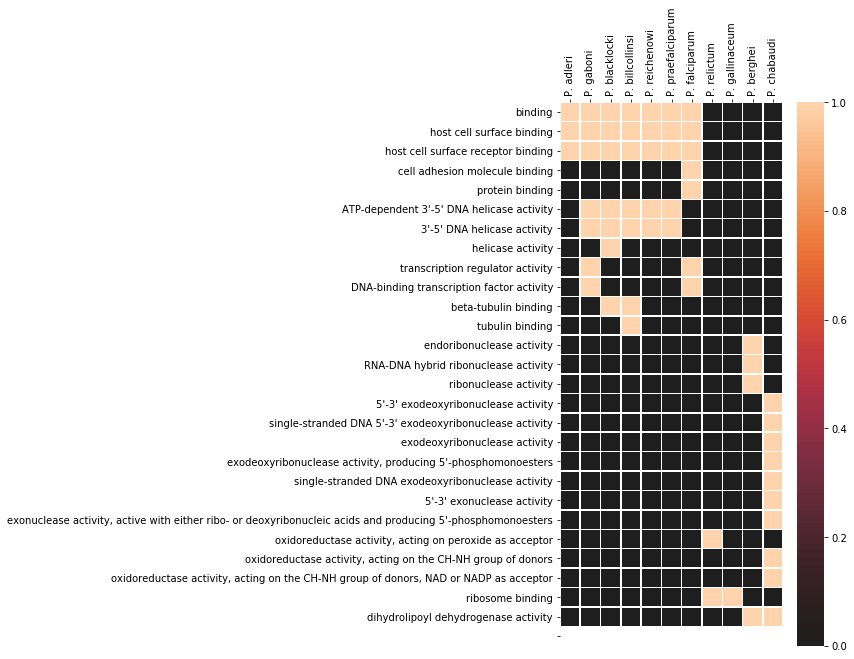

In [40]:
#Binned heatmap for molecular function

GO_terms_data = pd.read_csv("/Users/HunterGage/Desktop/Summary Data and Figures/GO_terms_species.csv")

GO_terms = []
index = 0
for term in list(GO_terms_data["GO Term"]):
    if list(GO_terms_data["Category"])[index] == "Molecular Function":
        if term not in GO_terms:
            GO_terms.append(term)
    index += 1

    
GO_terms_heatdata = {}
for term in sorted(GO_terms):
    species_dict = {"P. falciparum": 0, "P. adleri": 0, "P. gaboni": 0, "P. blacklocki": 0, "P. billcollinsi": 0, "P. reichenowi": 0, "P. praefalciparum": 0, "P. relictum": 0, "P. gallinaceum": 0, "P. berghei": 0, "P. chabaudi": 0}
    GO_terms_heatdata.update({term: species_dict})
    list_of_species_with_GOterm = []
    for species in species_dict:
        index = 0
        for GOterm in list(GO_terms_data["GO Term"]):
            if list(GO_terms_data["Species"])[index] == species:
                if GOterm == term:
                    if species not in list_of_species_with_GOterm:
                        list_of_species_with_GOterm.append(species)
            index += 1
    for species in list_of_species_with_GOterm:
        GO_terms_heatdata[term][species] = 1

fig, ax = plt.subplots(figsize=(5,10))

d = pd.DataFrame(GO_terms_heatdata)

categories = ["binding", "host cell surface binding", "host cell surface receptor binding", "cell adhesion molecule binding", "protein binding",
              "ATP-dependent 3'-5' DNA helicase activity", "3'-5' DNA helicase activity", "helicase activity", "transcription regulator activity", "DNA-binding transcription factor activity",
              "beta-tubulin binding", "tubulin binding", "endoribonuclease activity", "RNA-DNA hybrid ribonuclease activity", "ribonuclease activity", "5'-3' exodeoxyribonuclease activity", "single-stranded DNA 5'-3' exodeoxyribonuclease activity",
              "exodeoxyribonuclease activity", "exodeoxyribonuclease activity, producing 5'-phosphomonoesters", "single-stranded DNA exodeoxyribonuclease activity", "5'-3' exonuclease activity", "exonuclease activity, active with either ribo- or deoxyribonucleic acids and producing 5'-phosphomonoesters",
              "oxidoreductase activity, acting on peroxide as acceptor", "oxidoreductase activity, acting on the CH-NH group of donors", "oxidoreductase activity, acting on the CH-NH group of donors, NAD or NADP as acceptor", "ribosome binding", "dihydrolipoyl dehydrogenase activity", ""]

categories_unique = []
for c in categories:
    if c not in categories_unique:
        categories_unique.append(c)
        
d = d.reindex(columns=categories_unique)
d.index = pd.CategoricalIndex(d.index, categories=["P. adleri", "P. gaboni", "P. blacklocki", "P. billcollinsi", "P. reichenowi", "P. praefalciparum", "P. falciparum", "P. relictum", "P. gallinaceum", "P. berghei", "P. chabaudi"])
d.sort_index(level=0, inplace=True)
                                                    
sns.heatmap(pd.DataFrame(d).T, linewidths=0.5, vmax = 1, center = 0, annot=False, xticklabels=True, yticklabels=True, ax=ax)
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.savefig("/Users/HunterGage/Desktop/Summary Data and Figures/molecularfunction_binned.png", bbox_inches="tight", dpi=800)

[Text(0,1,'P. adleri'),
 Text(0,1,'P. gaboni'),
 Text(0,1,'P. blacklocki'),
 Text(0,1,'P. billcollinsi'),
 Text(0,1,'P. reichenowi'),
 Text(0,1,'P. praefalciparum'),
 Text(0,1,'P. falciparum'),
 Text(0,1,'P. relictum'),
 Text(0,1,'P. gallinaceum'),
 Text(0,1,'P. berghei'),
 Text(0,1,'P. chabaudi')]

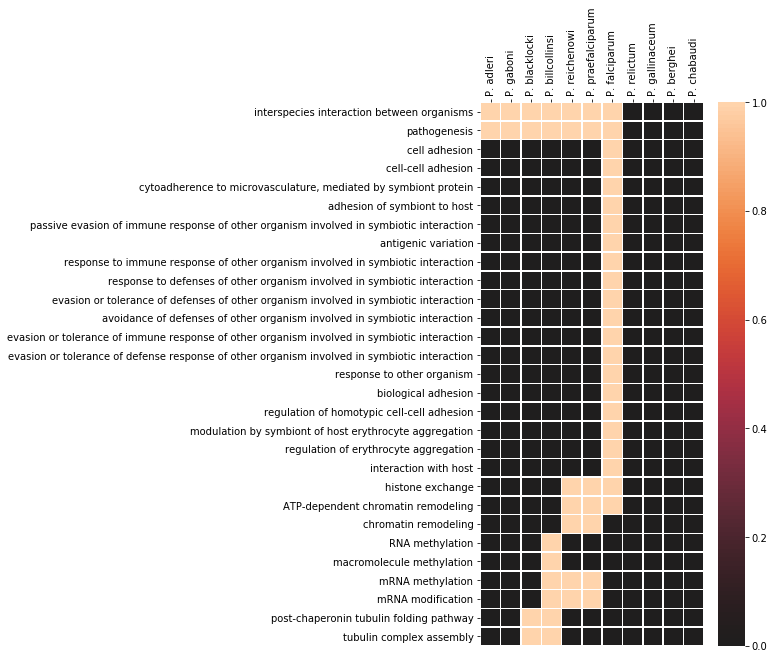

In [41]:
#Clean up biological processes heat map using binned GO terms

GO_terms_data = pd.read_csv("/Users/HunterGage/Desktop/Summary Data and Figures/GO_terms_species.csv")

GO_terms = []
index = 0
for term in list(GO_terms_data["GO Term"]):
    if list(GO_terms_data["Category"])[index] == "Biological Process":
        if term not in GO_terms:
            GO_terms.append(term)
    index += 1

    
GO_terms_heatdata = {}
for term in sorted(GO_terms):
    species_dict = {"P. falciparum": 0, "P. adleri": 0, "P. gaboni": 0, "P. blacklocki": 0, "P. billcollinsi": 0, "P. reichenowi": 0, "P. praefalciparum": 0, "P. relictum": 0, "P. gallinaceum": 0, "P. berghei": 0, "P. chabaudi": 0}
    GO_terms_heatdata.update({term: species_dict})
    list_of_species_with_GOterm = []
    for species in species_dict:
        index = 0
        for GOterm in list(GO_terms_data["GO Term"]):
            if list(GO_terms_data["Species"])[index] == species:
                if GOterm == term:
                    if species not in list_of_species_with_GOterm:
                        list_of_species_with_GOterm.append(species)
            index += 1
    for species in list_of_species_with_GOterm:
        GO_terms_heatdata[term][species] = 1

        
fig, ax = plt.subplots(figsize=(5,10))

d = pd.DataFrame(GO_terms_heatdata)

categories = ["interspecies interaction between organisms", "pathogenesis", "cell adhesion", "cell-cell adhesion", "cytoadherence to microvasculature, mediated by symbiont protein", "adhesion of symbiont to host", "passive evasion of immune response of other organism involved in symbiotic interaction",
             "antigenic variation", "response to immune response of other organism involved in symbiotic interaction", "response to defenses of other organism involved in symbiotic interaction", "evasion or tolerance of defenses of other organism involved in symbiotic interaction",
             "avoidance of defenses of other organism involved in symbiotic interaction", "evasion or tolerance of immune response of other organism involved in symbiotic interaction","evasion or tolerance of defense response of other organism involved in symbiotic interaction",
             "response to other organism", "biological adhesion", "regulation of homotypic cell-cell adhesion", "modulation by symbiont of host erythrocyte aggregation", "regulation of erythrocyte aggregation", "interaction with host",
             "histone exchange", "ATP-dependent chromatin remodeling", "chromatin remodeling", "RNA methylation", "macromolecule methylation", "mRNA methylation", "mRNA modification", "post-chaperonin tubulin folding pathway", "tubulin complex assembly"]

categories_unique = []
for c in categories:
    if c not in categories_unique:
        categories_unique.append(c)
        
d = d.reindex(columns=categories_unique)
d.index = pd.CategoricalIndex(d.index, categories=["P. adleri", "P. gaboni", "P. blacklocki", "P. billcollinsi", "P. reichenowi", "P. praefalciparum", "P. falciparum", "P. relictum", "P. gallinaceum", "P. berghei", "P. chabaudi"])
d.sort_index(level=0, inplace=True)

sns.heatmap(pd.DataFrame(d).T, linewidths=0.5, vmax = 1, center = 0, annot=False, xticklabels=True, yticklabels=True, ax=ax)
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

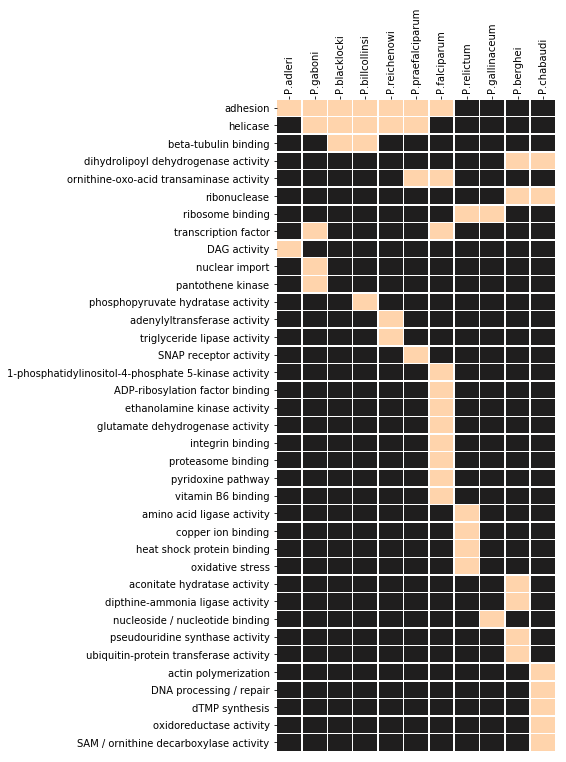

In [42]:
#Binned and ordered heatmap of GO terms for molecular function
#Used in Fig 7

GO_terms_heatdata = {"adhesion": {
      "P.adleri": 1, 
      "P.berghei": 0,
      "P.billcollinsi": 1,
      "P.blacklocki": 1,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 1,
      "P.gallinaceum": 0,
      "P.praefalciparum": 1,
      "P.reichenowi": 1,
      "P.relictum": 0
    },
    "helicase": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 1,
      "P.blacklocki": 1,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 1,
      "P.gallinaceum": 0,
      "P.praefalciparum": 1,
      "P.reichenowi": 1,
      "P.relictum": 0
    },
    "beta-tubulin binding": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 1,
      "P.blacklocki": 1,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "ornithine-oxo-acid transaminase activity": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 1,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "ribonuclease": {
      "P.adleri": 0,
      "P.berghei": 1,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "ribosome binding": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 1,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 1
    },
     "transcription factor": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 1,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "DAG activity": {
      "P.adleri": 1,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "nuclear import": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 1,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "pantothene kinase": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 1,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "phosphopyruvate hydratase activity": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 1,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "adenylyltransferase activity": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 1,
      "P.relictum": 0
    },
    "triglyceride lipase activity": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 1,
      "P.relictum": 0
    },
    "SNAP receptor activity": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 1,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "ADP-ribosylation factor binding": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "ethanolamine kinase activity": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "glutamate dehydrogenase activity": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "pyridoxine pathway": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "integrin binding": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "proteasome binding": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "1-phosphatidylinositol-4-phosphate 5-kinase activity": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "vitamin B6 binding": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "copper ion binding": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 1
    },
    "heat shock protein binding": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 1
    },
    "oxidative stress": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 1
    },
    "copper ion binding": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 1
    },
    "nucleoside / nucleotide binding": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 1,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "aconitate hydratase activity": {
      "P.adleri": 0,
      "P.berghei": 1,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "dipthine-ammonia ligase activity": {
      "P.adleri": 0,
      "P.berghei": 1,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "pseudouridine synthase activity": {
      "P.adleri": 0,
      "P.berghei": 1,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "ubiquitin-protein transferase activity": {
      "P.adleri": 0,
      "P.berghei": 1,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "actin polymerization": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "DNA processing / repair": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "oxidoreductase activity": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "dihydrolipoyl dehydrogenase activity": {
      "P.adleri": 0,
      "P.berghei": 1,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "dTMP synthesis": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "SAM / ornithine decarboxylase activity": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "amino acid ligase activity": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 1        
        }}

fig, ax = plt.subplots(figsize=(5,12))

d = pd.DataFrame(GO_terms_heatdata)

categories = ["adhesion", "helicase", "beta-tubulin binding", "dihydrolipoyl dehydrogenase activity", "ornithine-oxo-acid transaminase activity", "ribonuclease", "ribosome binding", "transcription factor", "DAG activity", "nuclear import",
             "pantothene kinase", "phosphopyruvate hydratase activity", "adenylyltransferase activity", "triglyceride lipase activity", "SNAP receptor activity", "1-phosphatidylinositol-4-phosphate 5-kinase activity", "ADP-ribosylation factor binding",
             "ethanolamine kinase activity", "glutamate dehydrogenase activity", "integrin binding", "proteasome binding", "pyridoxine pathway", "vitamin B6 binding", "amino acid ligase activity", "copper ion binding",
             "heat shock protein binding", "oxidative stress", "copper ion binding", "aconitate hydratase activity", "dipthine-ammonia ligase activity", "nucleoside / nucleotide binding", "pseudouridine synthase activity",
             "ubiquitin-protein transferase activity", "actin polymerization", "DNA processing / repair", "dTMP synthesis", "oxidoreductase activity", "SAM / ornithine decarboxylase activity"]
categories_unique = []
for c in categories:
    if c not in categories_unique:
        categories_unique.append(c)
        
d = d.reindex(columns=categories_unique)
d.index = pd.CategoricalIndex(d.index, categories=["P.adleri", "P.gaboni", "P.blacklocki", "P.billcollinsi", "P.reichenowi", "P.praefalciparum", "P.falciparum", "P.relictum", "P.gallinaceum", "P.berghei", "P.chabaudi"])
d.sort_index(level=0, inplace=True)                                                    

sns.heatmap(pd.DataFrame(d).T, linewidths=0.5, vmax = 1, center = 0, annot=False, xticklabels=True, yticklabels=True, cbar=False, ax=ax)
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.savefig("/Users/HunterGage/Desktop/Summary Data and Figures/molecularfunction_binned_together.png", bbox_inches="tight", dpi=300)

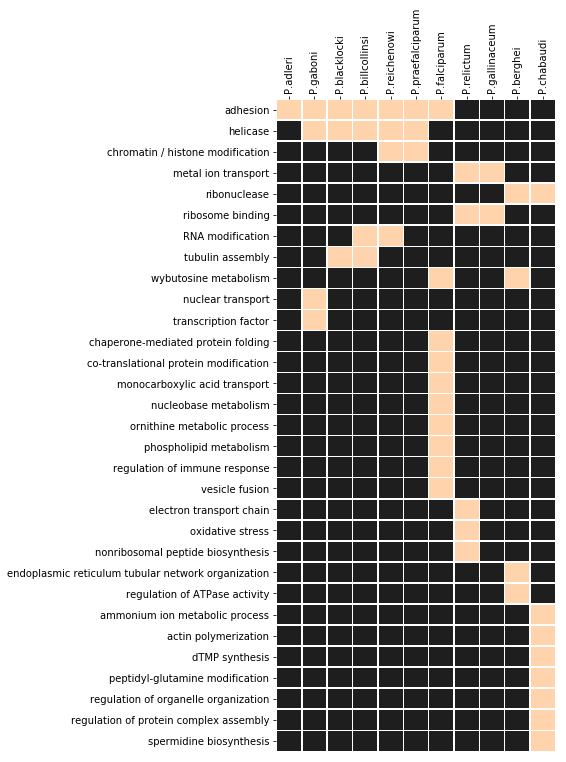

In [43]:
#Binned and ordered heatmap of GO terms for biological processes
#Used in Fig 7

GO_terms_heatdata = {"adhesion": {
      "P.adleri": 1, 
      "P.berghei": 0,
      "P.billcollinsi": 1,
      "P.blacklocki": 1,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 1,
      "P.gallinaceum": 0,
      "P.praefalciparum": 1,
      "P.reichenowi": 1,
      "P.relictum": 0
    },
    "helicase": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 1,
      "P.blacklocki": 1,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 1,
      "P.gallinaceum": 0,
      "P.praefalciparum": 1,
      "P.reichenowi": 1,
      "P.relictum": 0
    },
    "transcription factor": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 1,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "chromatin / histone modification": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 1,
      "P.reichenowi": 1,
      "P.relictum": 0
    },
    "RNA modification": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 1,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 1,
      "P.relictum": 0
    },
    "ribonuclease": {
      "P.adleri": 0,
      "P.berghei": 1,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "ribosome binding": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 1,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 1
    },
    "metal ion transport": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 1,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 1
    },
    "tubulin assembly": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 1,
      "P.blacklocki": 1,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "nuclear transport": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 1,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "oxidative stress": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 1
    },
    "electron transport chain": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 1
    },
    "nonribosomal peptide biosynthesis": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 1
    },
    "spermidine biosynthesis": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "dTMP synthesis": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "actin polymerization": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "peptidyl-glutamine modification": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "endoplasmic reticulum tubular network organization": {
      "P.adleri": 0,
      "P.berghei": 1,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "regulation of ATPase activity": {
      "P.adleri": 0,
      "P.berghei": 1,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
     "wybutosine metabolism": {
      "P.adleri": 0,
      "P.berghei": 1,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "nucleobase metabolism": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
     "chaperone-mediated protein folding": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "protein ubiquitination": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "monocarboxylic acid transport": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "co-translational protein modification": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "vesicle fusion": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "phospholipid metabolism": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "ornithine metabolic process": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "regulation of immune response": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "monocarboxylic acid transport": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 0,
      "P.falciparum": 1,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "ammonium ion metabolic process": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "regulation of protein complex assembly": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
    "regulation of organelle organization": {
      "P.adleri": 0,
      "P.berghei": 0,
      "P.billcollinsi": 0,
      "P.blacklocki": 0,
      "P.chabaudi": 1,
      "P.falciparum": 0,
      "P.gaboni": 0,
      "P.gallinaceum": 0,
      "P.praefalciparum": 0,
      "P.reichenowi": 0,
      "P.relictum": 0
    },
                    }

fig, ax = plt.subplots(figsize=(5,12))

d = pd.DataFrame(GO_terms_heatdata)

categories = ["adhesion", "helicase", "chromatin / histone modification", "metal ion transport", "ribonuclease", "ribosome binding", "RNA modification", "tubulin assembly", "wybutosine metabolism", "nuclear transport", "transcription factor", "chaperone-mediated protein folding", "co-translational protein modification", "monocarboxylic acid transport", "nucleobase metabolism", "ornithine metabolic process", "phospholipid metabolism", "regulation of immune response", "vesicle fusion",
             "electron transport chain", "oxidative stress", "nonribosomal peptide biosynthesis", "endoplasmic reticulum tubular network organization", "regulation of ATPase activity",
             "ammonium ion metabolic process", "actin polymerization", "dTMP synthesis", "peptidyl-glutamine modification", "regulation of organelle organization", "regulation of protein complex assembly", "spermidine biosynthesis"]
        
d = d.reindex(columns=categories)
d.index = pd.CategoricalIndex(d.index, categories=["P.adleri", "P.gaboni", "P.blacklocki", "P.billcollinsi", "P.reichenowi", "P.praefalciparum", "P.falciparum", "P.relictum", "P.gallinaceum", "P.berghei", "P.chabaudi"])
d.sort_index(level=0, inplace=True)
                                                    
sns.heatmap(pd.DataFrame(d).T, linewidths=0.5, vmax = 1, center = 0, annot=False, xticklabels=True, yticklabels=True, cbar=False, ax=ax)
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.savefig("/Users/HunterGage/Desktop/Summary Data and Figures/biologicalprocess_binned_together.png", bbox_inches="tight", dpi=300)